In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from nltk.corpus import stopwords

In [3]:
plt.style.use('seaborn')

# Exploratory Data Analysis of the Human Cytochrome P450 Gene Family

### Author: Vladimir Stoev

### Abstract

In recent years pharmacogenomics has become the cornerstone in elucidating the intrinsic interplay between individual's genetic makeup and the commonly prescribed drugs. Moreover, the promise of pharmacogenomics is that it will accelerate the movement to the so appreciated precision medicine while escaping 'one-drug-fits-all' paradigm. Conceptually, pharmacogenomics integrate in itself the study of genes and their function at genome-wide level - genomics, and the study of drug action - pharmacology. In turn, the two main areas of pharmacology - pharmacokinetics PKs, and pharmacodynamics PDs, focus on the factors that infuence the drug metabolism in the body - PKs level, and factors associated with the drug target(s) - PDs level. The subject of exploration in this project - the human Cytochrome P450 gene family, accounts for the metabolism of nearly 3/4 of all prescribed drugs. The main topics of examination throughout the project will be the genetic variability amongst the Cytochrome P450 genes, analysis of the drugs and their adverse effects associated with these genetic variants, as well as _tf-idf_ analysis of the phenotypic characteristics of the variants. The data used in the project is collected from the primary source of pharmacogenomic information - The Pharmacogenomics Knowledge Base (PharmGKB).

### I. Introduction to Pharmacogenomics

The  completion  of  the  Human  Genome  Project (HGP) in April 2003 yielded a permanent  foundation  for  biological  research  and  launched a new era in biomedicine. The goal of the HGP was to create a reference human genome sequence covering nearly the entire genome  with  an  error  rate  of  ~1 in 10,000 bases. In fact, the final sequence covers   99%   of   the   euchromatic   genome   with  fewer  than  350  gaps  and  has  an  error  rate  of  ~1  in  100,000  bases. One important consequence of the completion of the HGP was the emergence of new fields in biomedecine and molecular biology known informely as $omics$. Genomics, transcriptomics, proteomics, metabolomics, and epigenomics are only a small fraction of the many disciplines that arose with the HGP. The related suffix -ome is used to address the objects of study of these fields, such as the genome, proteome or metabolome, respectively. 

This project will deal with one particular omics science, namely pharmacogenomics. Pharmacogenomics is the study of how genes affect an individual's response to drugs. This new field of study combine in itself pharmacology (the study of drugs, and how they interact with the living organism) and genomics (the study of genes and their functions). Pharmacogenomics analyzes the genetic variants amongst individuals and how these variants affect drug action at pharmacokinetics PK level (absorbsion, distribution, metabolism, and excretion of the drugs) and pharmacodynamics PD level (the interaction between the drug and the biological target). The term pharmacogenomics is often used interchangeably with pharmacogenetics. Although both terms relate to drug response based on genetic influences, pharmacogenetics focuses on single drug-gene interactions, whereas pharmacogenomics encompasses a more genome-wide association approach, incorporating genomics and epigenetics while dealing with the effects of multiple genes on drug response. 

The field of pharmacogenomics aims to define those common genetic factors that contribute to variable serious adverse drug reactions ADRs, their underlying genetic mechanisms, and ultimately to implement genetic testing to improve drug efficacy and reduce toxicity. Furthermore, an understanding of the genetic basis of variable drug response can be used as a tool to expand the use of existing drugs to new indications and to develop new drugs. Well recognised examples of
genetically determined variability in drug response often involve single DNA variants common in a population and associated with relatively large effect sizes and clearly definable metaboliser phenotypes. As a result, the implementation of pharmacogenomic information into the clinical practice can eventually lead up to the so welcomed model of precision medicine. That is the approach of customzable healtcare by means of which medical decisions, treatments, or products are being tailored to a subgroup of patients, insted of using the model 'one-drug-fits-all'. However, several barriers are identified and need to be overcomed to routinely use pharmacogenomic variant data in improving drug prescribing and treatment. Of course, the central issue, again, is the cost - diagnostics do not come cheap, plus, the pharmaceutical industry do not have interests in manufacturing 'orphan' drugs, from which only small sub-groups of patients could have betefits. Moreover, some of the world’s first truly individualised cancer treatments utilizing genetically modified CAR-T cells (CAR-T stands for chimeric antigen t-cell receptor), despite having achieved impressive results in rare and advanced cancers, could be serious burden for reimbursement from private and public payers, due to eye-watering cost upwards of $400,000 per patient, per trietment. 

Despite the cost-related drawbacks, the field of pharmacogenomics is decisively heading to implementing the model of precision medicine in the clinic by continuously generating huge amounts of genetic data in connection with the different drug response. These data, by no means, should be left unanalyzed, and that is the moment when the power of artificial intelligence comes into play. Tumor detection in large medical images datasets, high-content screening (HCS) in drug discovery, and disease risk prediction using genetic variant data, are only a few examples of use cases for AI in precision medicine. 

Within the reach of this project will be analysis of data collceted from the Pharmacogenomics Knowledge Base (PharmGKB). PharmGKB is a publicly available, online knowledgebase responsible for the aggregation, curation, and integration of knowledge regarding the impact of human genetic variation on drug response. The main objectives of the analysis will be examination of some of the most common pharmacogenes implicated in the differential drug response, as well as exploration of their variants and associated drugs. The analysis of the data will end with natural language processing NLP of the variant-associated clinical phenotypes of the Cytochrome P450 gene family.   

### II. Exploration of the Genetic Variability in the Cytochrome P450 Gene Family

Two conceptual pathways describe an organism’s response to drug exposure. Pharmacokinetics defines variability in the processes (absorption, distribution, metabolism, and elimination) modulating delivery of drug and active metabolites to and removal from their site or sites of action. Pharmacodynamics describes variability in drug action that is not attributable to variable drug concentrations, which can reflect variability in the interaction of active drug with its effector molecules or other mechanisms such as variability in disease mechanisms.

The earliest examples of pharmacogenetic variability involved variability in pharmacodynamic processes. During and after World War 2, the first instances of genetically determined adverse drug reactions (ADRs) were described, including haemolytic anaemia in African-American soldiers with glucose-6-phosphate dehydrogenase (G6PD) deficiency exposed to antimalarials drugs, and prolonged paralysis following treatment with the muscle relaxant succinylcholine in patients with pseudocholinesterase deficiency. With the development of robust methods to measure concentrations of drugs and their metabolites in plasma and other sites came the ability to define patients who are pharmacokinetic outliers in whom unusually high or
low plasma concentrations were associated with variable efficacy or ADRs. This in turn led to studies defining
variants in key drug metabolising or transport genes as the basis for these responses. To date, the majority of variability to drug response is described in genes involved in pharmacokinetic processes, the most prevalent of which encode for drug-metabolizing enzymes part of the Cytochrome P450 (CYP) gene family. 

Cytochromes P450 (CYPs) is a superfamily of enzymes containing heme as a cofactor that function as monooxygenases. The term "P450" is derived from the spectrophotometric peak at the wavelength of the absorption maximum of the enzyme (450 nm) when it is in the reduced state and complexed with carbon monoxide. The Human Genome Project has identified 57 human genes coding for the various cytochrome P450 enzymes. Human CYPs are primarily membrane-associated proteins located either in the inner membrane of mitochondria or in the endoplasmic reticulum of cells. Cytochrome P450 enzymes are present in most tissues of the body, but are most concentrated in hepatocytes, the cells of the liver, where is the primary station of xenobiotics metabolism.  

CYPs metabolize thousands of endogenous and exogenous chemicals. While some CYPs metabolize only one (or a very few) substrates, such as CYP19 (aromatase), others may metabolize multiple substrates. From a clinical perspective, the most commonly tested CYPs include: CYP2D6, CYP2C19, CYP2C9, CYP3A4 and CYP3A5. These genes account for the metabolism of approximately 70-90% of currently available prescription drugs.

Now, when we got acquainted with the field of pharmacogenomics and the subject of analysis of this project - CYP genes, let's do some data science. 

As it was mentioned earlier, the data analyzed in this project is obtained from PharmGKB. PharmGKB has many different types of PGx-related information (PGx stands for pharmacogenomics or pharmacogenetics), including genetic variants (single-nucleotide polymorphisms (SNPs) and haplotypes, as well as some copy number variations (CNVs) and indels), genes, drugs, phenotypes (diseases and side effects) and PubMed IDs (PMIDs). 

We will begin our exploratary data analysis with loading our first dataset. It contains information about clinical annotations, manually created by the PharmGKB curators, and provide evidence-rated, genotype-based summary about particular pharmacogenetic variant-drug pairs.

Let's now read this dataset.

In [4]:
clinical_annotation_metadata = pd.read_table('Data/clinical_ann_metadata.tsv')

In [5]:
clinical_annotation_metadata

,Clinical Annotation ID,Location,Gene,Level of Evidence,Clinical Annotation Types,Genotype-Phenotype IDs,Annotation Text,Variant Annotations IDs,Variant Annotations,PMIDs,Evidence Count,Related Chemicals,Related Diseases,Biogeographical Groups,Chromosome
0,981755803,rs75527207,CFTR (PA109),1A,Efficacy,1450043467;1450043468;1450043469,AA:Ivacaftor is indicated in cystic fibrosis p...,981755665;981755678;982006840;982009991;104373...,Genotypes AA + AG are associated with respon...,19846789;21083385;22047557;22293084;22942289;2...,29,ivacaftor (PA165950341),Cystic Fibrosis (PA443829),Mixed Population,chr7
1,1449311190,rs4149056,SLCO1B1 (PA134865839),3,Dosage,1449311192;1449311193;1449311194,CC:Patients with the CC genotype and Precursor...,1449311153,Genotypes CC + CT is associated with decreas...,29683944,1,mercaptopurine (PA450379);methotrexate (PA450428),Precursor Cell Lymphoblastic Leukemia-Lymphoma...,Near Eastern,chr12
2,1449191690,rs141033578,CFTR (PA109),1A,Efficacy,1449191692;1449191693;1449191694,CC:Patients with the CC genotype (do not have ...,1449191113,Allele T is associated with activity of CFTR...,23891399,1,ivacaftor (PA165950341),Cystic Fibrosis (PA443829),Not applicable - study was carried out in FRT ...,chr7
3,1449191746,rs78769542,CFTR (PA109),1A,Efficacy,1449191748;1449191749;1449191750,AA:Patients with the AA genotype (two copies o...,1449191063,Allele A is associated with activity of CFTR...,23891399,1,ivacaftor (PA165950341),Cystic Fibrosis (PA443829),Not applicable - study was carried out in FRT ...,chr7
4,981204774,rs1799971,OPRM1 (PA31945),3,Efficacy,982037129;982037130;982037131,AA:Patients with AA genotype may have an incre...,655386751;655386750;655385584,Genotype GG is associated with increased lik...,15007373;17224915,3,Drugs used in nicotine dependence (PA164712720...,Tobacco Use Disorder (PA445876),European,chr6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4553,1451212540,rs62103056,NaN,3,Efficacy,1451212542;1451212543;1451212544,AA:Patients with the AA genotype with malaria ...,1451212190,Allele A is associated with increased likeli...,32433338,1,tafenoquine (PA166115580),Malaria (PA444859),Mixed Population,chr18
4554,1451217440,rs12979860,IFNL3 (PA134952671);IFNL4 (PA166049147),3,Efficacy,1451217442;1451217443;1451217444,CC:Patients with hepatitis B and the CC genoty...,1448631931;1450810253;1449713162,Genotype TT is associated with increased lik...,28453395;30016335;31201901,3,peginterferon alfa-2a (PA164749390),"Hepatitis B, Chronic (PA446862)",Mixed Population,chr19
4555,1451217520,rs12979860,IFNL3 (PA134952671);IFNL4 (PA166049147),3,Efficacy,1451217522;1451217523;1451217524,CC:Patients with the CC genotype may have an i...,1449190317,Genotype CC is associated with increased sus...,29534310,1,sofosbuvir (PA166122593),"Hepatitis C, Chronic (PA446863)",Unknown,chr19
4556,1451217540,rs12979860,IFNL3 (PA134952671);IFNL4 (PA166049147),3,NaN,1451217542;1451217543;1451217544,CC:Patients with a HCV genotype I infection an...,981352209;981352215,Genotype CC is associated with increased sus...,22438096,2,interferons (PA451999),Hepatitis C (PA444445),East Asian,chr19


Ok, we got our dataset, now let's verify the dimensionality of our DataFrame.

In [6]:
clinical_annotation_metadata.shape

(4558, 15)

15 coulmns with 4558 records each, ok. Now, it is a good idea to explore these columns and their associated data types. 

In [7]:
clinical_annotation_metadata.dtypes

Clinical Annotation ID        int64
Location                     object
Gene                         object
Level of Evidence            object
Clinical Annotation Types    object
Genotype-Phenotype IDs       object
Annotation Text              object
Variant Annotations IDs      object
Variant Annotations          object
PMIDs                        object
Evidence Count                int64
Related Chemicals            object
Related Diseases             object
Biogeographical Groups       object
Chromosome                   object
dtype: object

We can see that 13 out of 15 columns are with dtype object, which means that they are with mixed types of data. The columns `Clinical Annotation ID` and `Evidence Count` are dtype int64. The column Clinical Annotation contains unique PharmGKB ID number for each variant - drug annotation, while the column Evidence Count holds information for the number of supporting PubMed IDs (PMIDs). That is the number of times this variant - drug pair appeared in PubMed. 

Now, let's explore the other columns with `dtype: object` and find out what information is stored there. 

First, we can take random sample from our dataset. 

In [8]:
clinical_annotation_metadata.sample(20)

,Clinical Annotation ID,Location,Gene,Level of Evidence,Clinical Annotation Types,Genotype-Phenotype IDs,Annotation Text,Variant Annotations IDs,Variant Annotations,PMIDs,Evidence Count,Related Chemicals,Related Diseases,Biogeographical Groups,Chromosome
1309,655386310,rs870995,PIK3CA (PA33308),4,Dosage,655386311;655386312;655386313,AA:Patients with the AA genotype may have decr...,699638956,Allele C is associated with increased cleara...,20157331,1,docetaxel (PA449383),"Carcinoma, Non-Small-Cell Lung (PA443622)",European,chr3
3176,1444673197,rs13207351,VEGFA (PA37302),3,Efficacy,1444673204;1444673205;1444673206,AA:Patients with the AA genotype and breast ca...,1184512103,Genotype GG is associated with decreased pro...,24061601,1,docetaxel (PA449383),Breast Neoplasms (PA443560),Unknown,chr6
626,1183491333,rs4673,CYBA (PA27075),3,Other,1183491350;1183491351;1183491352,AA:Patients with the AA genotype and Hyperchol...,982045376,Genotypes AA + AG are associated with increa...,15936011,1,simvastatin (PA451363),Hypercholesterolemia (PA444516),Unknown,chr16
3763,1448264356,HLA-DRB1*04:03:01,HLA-DRB1 (PA35072),3,Toxicity/ADR,1448264358,*04:03:01:Patients with one or two copies of t...,1448264230,HLA-DRB1 *04:03:01 is associated with increa...,27666425,1,oxcarbazepine (PA450732),Epilepsy (PA444065),East Asian,NaN
3559,1447982761,rs745746329,CYP2D6 (PA128),4,Metabolism/PK,1447982765;1447982764;1447982763,CC:Patients with the CC genotype may have incr...,1447958868,Allele T is associated with decreased cleara...,26310775,1,bufuralol (PA166110256);dextromethorphan (PA44...,NaN,Unknown,chr22
886,1449167200,rs12302749,SPSB2 (PA142670872),4,Efficacy,1449167207;1449167208;1449167209,CC:Patients with the CC genotype and Attention...,1449166009,Allele C is associated with increased respon...,29382897,1,methylphenidate (PA450464),Attention Deficit Disorder with Hyperactivity ...,Mixed Population,chr12
1545,655384979,rs2842030,RGS4 (PA34375),4,Efficacy,655384982;655384981;655384980,GG:Patients with the GG genotype is associated...,608431255,Genotype GG is associated with increased res...,17588543,1,risperidone (PA451257),Schizophrenia (PA447216),European,chr1
456,1043880792,rs5443,GNB3 (PA176),3,Efficacy,1183615553;1183615554;1183615555,CC:Patients with the CC genotype and essential...,982044907;982044939;982044965,Genotype CC is associated with increased res...,20235788,3,atenolol (PA448499),Essential hypertension (PA447288),Mixed Population,chr12
3771,1448423436,rs12436663,PRORP (PA134879499),3,Efficacy,1448423438;1448423439;1448423440,AA:Patients with the AA genotype and asthma ma...,1448423402,Genotype AA is associated with decreased res...,25963335,1,zileuton (PA451955),Asthma (PA443450),Unknown,chr14
1800,1449004522,rs73594404,NaN,3,Toxicity/ADR,1449004524;1449004525;1449004526,AA:Patients with nasopharyngeal cancer and the...,1448821255;1449004423,Genotypes AA + AG are associated with increa...,28814798,2,Platinum compounds (PA164713176);radiotherapy ...,Anemia (PA443340);Dermatitis (PA443875);Leukop...,East Asian,chr16


We can see that many of the columns hold more than one record. For instance, the `Gene` column has rows with more than one gene, while the column `Location` holds more than one variant for those genes. The same applies for the rest of the columns with dtype object. 

Let's explore these columns more thoroughly. 

In [9]:
clinical_annotation_metadata['Location'].sample(20)

1417              rs6028945
2217      HLA-DRB1*14:01:01
3110              rs1045642
4437              rs1799971
26                rs1045642
1821              rs2298881
1082         HLA-B*15:02:01
331               rs1801020
4072               rs846664
3161             rs12595985
1629                rs20417
1884              rs1042028
1591             rs17731538
1580              rs1487278
4540    UGT1A1*1, UGT1A1*28
2179              rs3732219
2364              rs1801252
1731              rs1045642
2405                 rs7294
2800                 rs6295
Name: Location, dtype: object

The column `Location` comprises of the most precise variant location available troughout NCBI database.   Pharmacogeneticists adopted a star nomenclature (eg, CYP2C19\*2) to describe variants in genes (sometimes termed pharmacogenes) underlying variability in drug response. Some star alleles can include more than one variant (eg, TPMT\*3A designates an allele defined by the presence of two single-nucleotide polymorphisms SNPs), and distinguishing this allele from those carrying only one of the SNPs can be challenging. Although the star nomenclature persists, as the understanding of the numbers of variants in important pharmacogenes increases, attempts are being made to reconcile the notation with alternate variant nomenclature, such as the conventional "rs" designation which comes from RefSNPs (rs) ID number from dbSNP database.

We will have particular interest in this column, and we will explore it further, but before we do that, let's first pay attention to another attractive column for our analysis - the `Level Of Evidence` column. 

In [10]:
clinical_annotation_metadata['Level of Evidence'].sort_values().unique()

array(['1A', '1B', '2A', '2B', '3', '4'], dtype=object)

Clinical annotations combine all variant annotations that discuss the same variant - drug phenotype association and bring them together into a single written summary of the association. Each clinical annotation is also given a level of evidence, providing a measure of confidence in the association. The level of evidence for a clinical annotation is manually assessed, and is based on criteria such as the number of studies finding positive versus negative results, p-values and study sizes. 

As we can see from the unique values of the column `Level of Evidence`, each clinical annotation has an "Evidence Strength", which ranks the level of evidence in the literature curated by PharmGKB for that association. The "strenght" of evidence is in ascending order, with 1A and 1B providing the most significant level of evidence. 

In the column `Clinical Annotation Types` are placed tags for the type of study.

In [11]:
clinical_annotation_metadata['Clinical Annotation Types'].unique()

array(['Efficacy', 'Dosage', 'Toxicity/ADR', 'Metabolism/PK', 'Other',
       'Efficacy;Toxicity/ADR', 'Efficacy;Metabolism/PK',
       'Dosage;Efficacy', nan, 'Efficacy;Toxicity/ADR;Metabolism/PK',
       'Dosage;Metabolism/PK', 'Dosage;Toxicity/ADR',
       'Toxicity/ADR;Metabolism/PK', 'Dosage;Efficacy;Toxicity/ADR',
       'Dosage;Other', 'Toxicity/ADR;Other',
       'Dosage;Efficacy;Metabolism/PK',
       'Dosage;Toxicity/ADR;Metabolism/PK'], dtype=object)

The above column will not be of interest to us, in contrast to the column `Genotype-Phenotype IDs`, which contains unique ID numbers, which we will use later on in our analysis. 

In [12]:
clinical_annotation_metadata['Genotype-Phenotype IDs'].head(10)

0                     1450043467;1450043468;1450043469
1                     1449311192;1449311193;1449311194
2                     1449191692;1449191693;1449191694
3                     1449191748;1449191749;1449191750
4                        982037129;982037130;982037131
5                     1446905293;1446905294;1446905295
6                     1449566381;1449566382;1449566383
7    1449166659;1449166660;1449166661;1449166662;14...
8                     1449155609;1449155610;1449155611
9                     1449155656;1449155657;1449155658
Name: Genotype-Phenotype IDs, dtype: object

As we can see, each record in the column is made up of several ID numbers, which we will have to separate as individual records. But, again, leter in the analysis. 

The column `Annotation Text` contains written summary of the clinical annotation for each genotype.  

In [13]:
clinical_annotation_metadata['Annotation Text'].sample(10)

1470    AA:Patients with the AA genotype and breast ca...
862     CC:Patients with the CC genotype may have decr...
816     AA:Patients with the AA genotype and hypertens...
4036    GG:Patients with the GG genotype and type 2 di...
1858    AA:Patients with the AA genotype may have a de...
955     CC:Patients with the CC genotype and Attention...
4538    *1/*1:Women with the UGT1A1*1/*1 genotype and ...
3411    AA:Patients with the AA genotype and cancer ma...
3686    GG:Patients with the GG genotype and decompens...
1339    CC:Patients with the CC genotype and Rheumatoi...
Name: Annotation Text, dtype: object

In [14]:
clinical_annotation_metadata['Annotation Text'][2856]

"CC:Patients with the CC genotype and major depression may have decreased response to citalopram and escitalopram as compared to patients with the GG genotype. Other genetic and clinical factors may also influence a patient's response to citalopram and escitalopram.; CG:Patients with the CG genotype and major depression may have increased response to citalopram and escitalopram as compared to patients with the CC genotype or may have decreased response to citalopram and escitalopram as compared to patients with the GG genotype. Other genetic and clinical factors may also influence a patient's response to citalopram and escitalopram.; GG:Patients with the GG genotype and major depression may have increased response to citalopram and escitalopram as compared to patients with the CC genotype. Other genetic and clinical factors may also influence a patient's response to citalopram and escitalopram."

The column `Variant Annotation` represents summaries describing how a particular genetic polymophism is associated with a drug response, as reported in a single publication. Examples of drug responses include adverse drug reactions, changes in drug efficacy and alterations in how quickly or slowly a drug is metabolized.

In [15]:
clinical_annotation_metadata['Variant Annotations'].sample(10)

1662    Allele C  is associated with  decreased expres...
55      Allele G  is associated with  decreased sulfat...
801     Genotype GG  is associated with  increased res...
1211    Genotypes CC + CT  is associated with  increas...
2255    Genotype AA  is associated with  increased abs...
4290    CYP3A4 *1B  is associated with  decreased clea...
4318    Allele G  is associated with  increased risk o...
3357    Genotype CC  is associated with  increased con...
867     CYP2C19 *2/*2 + *3/*3 is associated with decre...
4052    Allele T  is associated with  increased respon...
Name: Variant Annotations, dtype: object

In [16]:
clinical_annotation_metadata['Variant Annotations'][2856]

'Allele G  is associated with  increased response to citalopram and escitalopram in people with Depressive Disorder, Major as compared to allele C.'

The columns `Related Chemicals` and `Biogeographical Groups` will be important part of our analysis in this section. 

`Related Chemicals` stores information about drug(s) associated with the variant(s) in the annotation. 

In [17]:
clinical_annotation_metadata['Related Chemicals'].unique()

array(['ivacaftor (PA165950341)',
       'mercaptopurine (PA450379);methotrexate (PA450428)',
       'Drugs used in nicotine dependence (PA164712720);nicotine (PA450626)',
       'atorvastatin (PA448500);hmg coa reductase inhibitors (PA133950441);rosuvastatin (PA134308647)',
       'hydrochlorothiazide (PA449899)', 'risperidone (PA451257)',
       'ustekinumab (PA166048654)',
       'Tumor necrosis factor alpha (TNF-alpha) inhibitors (PA164713366)',
       'Tumor necrosis factor alpha (TNF-alpha) inhibitors (PA164713366);ustekinumab (PA166048654)',
       'nevirapine (PA450616)', 'lumacaftor (PA166114483)',
       'capecitabine (PA448771)', 'warfarin (PA451906)',
       'hmg coa reductase inhibitors (PA133950441)',
       'Platinum compounds (PA164713176)', 'bupropion (PA448687)',
       'quetiapine (PA451201)', 'nicotine (PA450626)',
       'fentanyl (PA449599)',
       'bupropion (PA448687);Drugs used in nicotine dependence (PA164712720);nicotine (PA450626);varenicline (PA164781343)'

Again, this column has multiple values (drugs) per record. 

If the variant - drug association was found in one particular race, it is designated in the column `Biogeographical Groups`.

In [18]:
clinical_annotation_metadata['Biogeographical Groups'].sort_values().unique()

array(['African American/Afro-Caribbean', 'American',
       'Central/South Asian', 'East Asian', 'European', 'In vitro',
       'Latino', 'Mixed Population', 'NCI-60 cell lines', 'Near Eastern',
       'Not applicable - in vitro study with FRT cells',
       'Not applicable - study was carried out in FRT cells',
       'Not applicable - study was carried out in PBE cells', 'Oceanian',
       'Sub-Saharan African', 'Unknown', 'cell lines', 'in vitro', nan],
      dtype=object)

Now, after we got acquainted with our first dataset, let's see if there is some missing values in it.

In [19]:
clinical_annotation_metadata.isnull().any()

Clinical Annotation ID       False
Location                     False
Gene                          True
Level of Evidence            False
Clinical Annotation Types     True
Genotype-Phenotype IDs       False
Annotation Text              False
Variant Annotations IDs      False
Variant Annotations          False
PMIDs                        False
Evidence Count               False
Related Chemicals            False
Related Diseases              True
Biogeographical Groups        True
Chromosome                    True
dtype: bool

We will use the columns `Gene` and `Biogeographical Groups` in our analysis, and since there exists missing values, we will have to substitute them or discard them. 

But first, let's see which are those records without values in the column `Gene`. 

In [20]:
clinical_annotation_metadata[clinical_annotation_metadata['Gene'].isnull()]

,Clinical Annotation ID,Location,Gene,Level of Evidence,Clinical Annotation Types,Genotype-Phenotype IDs,Annotation Text,Variant Annotations IDs,Variant Annotations,PMIDs,Evidence Count,Related Chemicals,Related Diseases,Biogeographical Groups,Chromosome
6,1449566379,rs11065987,NaN,3,Efficacy,1449566381;1449566382;1449566383,AA:Patients with the AA genotype and hypertens...,1449566369,Genotypes AA + AG is associated with increas...,29925376,1,hydrochlorothiazide (PA449899),Hypertension (PA444552),European,chr12
23,1450815166,rs7395555,NaN,3,Efficacy,1450815168;1450815169;1450815170,CC:Patients with schizophrenia and the CC geno...,1450815030,Allele C is associated with increased respon...,23241943,1,risperidone (PA451257),Schizophrenia (PA447216),Mixed Population,chr11
46,981237670,rs1799853,NaN,3,Efficacy;Toxicity/ADR,1448615596;1448615597;1448615598,CC:Patients with the CC genotype and Epilepsy ...,769250046;769248925;769248937;769259087;769250...,Genotype TT is associated with increased lik...,10901705;15805193;16815679;19617466;21068649;2...,9,phenytoin (PA450947),Epilepsy (PA444065),Mixed Population,chr10
83,1449167568,rs1061115,NaN,4,Efficacy,1449167580;1449167581;1449167582,AA:Patients with the AA genotype and Attention...,1449166351,Allele G is associated with increased respon...,29382897,1,methylphenidate (PA450464),Attention Deficit Disorder with Hyperactivity ...,Mixed Population,chr10
84,1449168307,rs4437856,NaN,4,Efficacy,1449168309;1449168310;1449168311,AA:Patients with the AA genotype may have a de...,1449168118,Allele A is associated with decreased respon...,29407288,1,duloxetine (PA10066),"Depressive Disorder, Major (PA447321)",European,chr1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,1451151478,rs56722963,NaN,3,Toxicity/ADR,1451151480;1451151481;1451151482,CC:Patients with the CC genotype may be at an ...,1451149858,Allele T is associated with decreased risk o...,32451486,1,ethanol (PA448073),Alcoholism (PA443309),European,chr10
4510,1451151500,rs6589386,NaN,3,Toxicity/ADR,1451151502;1451151503;1451151504,CC:Patients with the CC genotype may be at an ...,1451149880,Allele T is associated with decreased risk o...,32451486,1,ethanol (PA448073),Alcoholism (PA443309),European,chr11
4511,1451151490,rs1783835,NaN,3,Toxicity/ADR,1451151492;1451151493;1451151494,AA:Patients with the AA genotype may be at a d...,1451149900,Allele A is associated with decreased risk o...,32451486,1,ethanol (PA448073),Alcoholism (PA443309),European,chr11
4513,1451151512,rs8008020,NaN,3,Toxicity/ADR,1451151514;1451151515;1451151516,CC:Patients with the CC genotype may be at a d...,1451149947,Allele T is associated with increased risk o...,32451486,1,ethanol (PA448073),Alcoholism (PA443309),European,chr14


227 rows. It is quite a lot. We will use this column to filter out our genes of interest (CYP genes), but before that we will have to render all those records which are made up of more than one gene to hold exactly one gene, not more. In order to do that, we will have to write a function that splits the values and expand the DataFrame so that the new DataFrame has only one gene per rocord. In order that function to work, we will have to fill up all those missing values. 

Let's do that.

In [21]:
# fill up the missing values in `gene` column

clinical_annotation_metadata['Gene'] = clinical_annotation_metadata['Gene'].fillna('missing')

Let's now verify if there has left any `NaN` values in our `Gene` column.

In [22]:
clinical_annotation_metadata['Gene'].isnull().any()

False

`False`, excellently. 

Now, let's taka a random sample from our `Gene` column, with say, 50 records, to verify that there are records with multiple values (genes) per record.

In [23]:
clinical_annotation_metadata['Gene'].sample(50)

2579                                VEGFA (PA37302)
4105                                HLA-B (PA35056)
4150                                        missing
120                                 ERCC2 (PA27848)
3380                                  ABCB1 (PA267)
4525                                 CYP2D6 (PA128)
4438                                   COMT (PA117)
1793                                GSTP1 (PA29028)
3449                               CHRNA5 (PA26491)
3115                                 CYP2B6 (PA123)
2144                                   ESR1 (PA156)
4513                                        missing
1740                                  ABCB1 (PA267)
3948                 CYP3A (PA27114);CYP3A4 (PA130)
4084                                  NR1I3 (PA391)
1807                                        missing
1963                 ABCC8 (PA24395);KCNJ11 (PA217)
617                               NEUROD1 (PA31564)
3572    ADORA2A (PA24584);ADORA2A-AS1 (PA165378332)
1588        

There exists multiple values per record. 

Now, that we could do is to separate those values and expand our DataFrame so that each gene to be set as distinct record. 

In order to do that, will have to write a function that recieves as parameters - a DataFrame, and column to split on, and a separator which will be used to split the column's values. The function will return an expanded DataFrame with one value per record.  

Let's define that function.

In [24]:
def explode_string(dataframe, column, separator):
    """
    Split the values of a column and expand so the new DataFrame has one split value per row.
    """
    string = dataframe[column]
    index = np.arange(len(string)).repeat(string.str.count(separator) + 1)
    
    return dataframe.iloc[index].assign(**{column: separator.join(string).split(separator)}).reset_index(drop = True)

Now, let's use this function to split all rows with muliple genes in them.

In [25]:
explode_string(clinical_annotation_metadata, 'Gene', ';')

,Clinical Annotation ID,Location,Gene,Level of Evidence,Clinical Annotation Types,Genotype-Phenotype IDs,Annotation Text,Variant Annotations IDs,Variant Annotations,PMIDs,Evidence Count,Related Chemicals,Related Diseases,Biogeographical Groups,Chromosome
0,981755803,rs75527207,CFTR (PA109),1A,Efficacy,1450043467;1450043468;1450043469,AA:Ivacaftor is indicated in cystic fibrosis p...,981755665;981755678;982006840;982009991;104373...,Genotypes AA + AG are associated with respon...,19846789;21083385;22047557;22293084;22942289;2...,29,ivacaftor (PA165950341),Cystic Fibrosis (PA443829),Mixed Population,chr7
1,1449311190,rs4149056,SLCO1B1 (PA134865839),3,Dosage,1449311192;1449311193;1449311194,CC:Patients with the CC genotype and Precursor...,1449311153,Genotypes CC + CT is associated with decreas...,29683944,1,mercaptopurine (PA450379);methotrexate (PA450428),Precursor Cell Lymphoblastic Leukemia-Lymphoma...,Near Eastern,chr12
2,1449191690,rs141033578,CFTR (PA109),1A,Efficacy,1449191692;1449191693;1449191694,CC:Patients with the CC genotype (do not have ...,1449191113,Allele T is associated with activity of CFTR...,23891399,1,ivacaftor (PA165950341),Cystic Fibrosis (PA443829),Not applicable - study was carried out in FRT ...,chr7
3,1449191746,rs78769542,CFTR (PA109),1A,Efficacy,1449191748;1449191749;1449191750,AA:Patients with the AA genotype (two copies o...,1449191063,Allele A is associated with activity of CFTR...,23891399,1,ivacaftor (PA165950341),Cystic Fibrosis (PA443829),Not applicable - study was carried out in FRT ...,chr7
4,981204774,rs1799971,OPRM1 (PA31945),3,Efficacy,982037129;982037130;982037131,AA:Patients with AA genotype may have an incre...,655386751;655386750;655385584,Genotype GG is associated with increased lik...,15007373;17224915,3,Drugs used in nicotine dependence (PA164712720...,Tobacco Use Disorder (PA445876),European,chr6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4689,1451217520,rs12979860,IFNL4 (PA166049147),3,Efficacy,1451217522;1451217523;1451217524,CC:Patients with the CC genotype may have an i...,1449190317,Genotype CC is associated with increased sus...,29534310,1,sofosbuvir (PA166122593),"Hepatitis C, Chronic (PA446863)",Unknown,chr19
4690,1451217540,rs12979860,IFNL3 (PA134952671),3,NaN,1451217542;1451217543;1451217544,CC:Patients with a HCV genotype I infection an...,981352209;981352215,Genotype CC is associated with increased sus...,22438096,2,interferons (PA451999),Hepatitis C (PA444445),East Asian,chr19
4691,1451217540,rs12979860,IFNL4 (PA166049147),3,NaN,1451217542;1451217543;1451217544,CC:Patients with a HCV genotype I infection an...,981352209;981352215,Genotype CC is associated with increased sus...,22438096,2,interferons (PA451999),Hepatitis C (PA444445),East Asian,chr19
4692,1451217560,rs12979860,IFNL3 (PA134952671),3,Efficacy,1451217562;1451217563;1451217564,CC:Patients with the CC genotype may have an i...,1447951883,Genotype CC is associated with increased res...,26334898,1,interferons (PA451999),Hepatitis C (PA444445),European,chr19


As we can see, the dimensionality of our DataFrame increased from 4558 rows, initially, to 4694 after we splited the values.

Now, let's overwrite our `clinical_annotation_metadata` variable with the expanded dataset.

In [26]:
clinical_annotation_metadata = explode_string(clinical_annotation_metadata, 'Gene', ';')

We may take out a random sample from our new `Gene` column to verify if there has left records with multiple genes.

In [27]:
clinical_annotation_metadata['Gene'].sample(50)

1637            ABCC1 (PA244)
3284           THBD (PA36496)
2648            MTHFR (PA245)
4260           CYP2B6 (PA123)
3717           CYP3A4 (PA130)
93                    missing
4125            ABCB1 (PA267)
2475         FCGR3A (PA28065)
1484            ABCB1 (PA267)
4380     VKORC1 (PA133787052)
4328          PLIN1 (PA33409)
2840          HTR1B (PA29549)
3768          HLA-B (PA35056)
1302            ABCB1 (PA267)
3602         CHRNA5 (PA26491)
3505           TJP1 (PA36532)
2842         CELSR2 (PA26394)
4253          SLC22A1 (PA329)
1214          SCN4A (PA35006)
4611            ADRA2A (PA35)
1532    SLCO1B1 (PA134865839)
951           SLC31A1 (PA118)
1616          CRHR2 (PA26875)
3872       HLA-DRB1 (PA35072)
215                CDA (PA98)
2843           CYP3A5 (PA131)
1587            HTR2C (PA194)
51            SULT1A3 (PA344)
4005             ESR1 (PA156)
4280           UGT1A1 (PA420)
2149        ALDH1A1 (PA24692)
3050          SLIT1 (PA35938)
1703        ADORA2A (PA24584)
3574      

Everything looks all right. 

We can even verify it more precisely. 

In [28]:
clinical_annotation_metadata['Gene'].str.contains(';').any()

False

Let's find out how many unique genes contains our `Gene` column.

In [29]:
len(clinical_annotation_metadata['Gene'].unique())

1026

1026 genes annotated in PharmGKB. Interestingly, approximately 5 % of all human genes are implicated in one or another way in drug metabolism, or are targets for drugs.

Now, because to all genes are assigned unique PharmGKB ID numbers beginnig with 'PA' and some digits after that, which honestly is a quite annoying, we will discard them, to make the column more tidy and well-looking.

In [30]:
# remove everything after the white space in `gene` column

clinical_annotation_metadata['Gene'] = clinical_annotation_metadata['Gene'].str.split(' ').str[0]

In [31]:
clinical_annotation_metadata['Gene'].sample(20)

3197      NR1I2
3240      ABCC5
1364     CD3EAP
4234      NR1I2
4321      IFNL3
3404      ABCB1
3949    missing
1235     CYP2C8
1864     UGT1A8
4598       NAT2
4506     UGT2B7
4642    missing
4169      CTLA4
3700     CYP2C9
1742     UGT1A1
1198        ATM
2420       RYR1
1645     CYP2D6
2681       IL1B
878      SACM1L
Name: Gene, dtype: object

That looks better. 

Now, let's verify how many Cytochrome P450 genes are there in our dataset. 

In [32]:
clinical_annotation_metadata[clinical_annotation_metadata['Gene'].str.contains('CYP')]

,Clinical Annotation ID,Location,Gene,Level of Evidence,Clinical Annotation Types,Genotype-Phenotype IDs,Annotation Text,Variant Annotations IDs,Variant Annotations,PMIDs,Evidence Count,Related Chemicals,Related Diseases,Biogeographical Groups,Chromosome
7,1448999716,"CYP2D6*1, CYP2D6*10, CYP2D6*87, CYP2D6*88, CYP...",CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
39,1449718265,rs12248560,CYP2C19,3,Toxicity/ADR,1449718267;1449718268;1449718269,CC:Patients with the CC genotype and breast ca...,1449718012,Genotype CC is associated with increased ris...,29507678,1,cyclophosphamide (PA449165);doxorubicin (PA449...,Breast Neoplasms (PA443560),Unknown,chr10
49,981238437,rs1057910,CYP2C9,2A,Toxicity/ADR,981238438;981238439;981238440,AA:Patients with the AA genotype who are treat...,827826832;827826844,Allele C is associated with increased risk o...,14707031;17681167,2,"Antiinflammatory agents, non-steroids (PA16471...",NaN,Unknown,chr10
72,1449718242,rs1056836,CYP1B1,3,Toxicity/ADR,1449718244;1449718245;1449718246,CC:Patients with the CC genotype and breast ca...,1449718142,Genotype CC is associated with increased ris...,29507678,1,cyclophosphamide (PA449165);doxorubicin (PA449...,Breast Neoplasms (PA443560),Unknown,chr2
82,1449005041,rs776746,CYP3A,3,Metabolism/PK,1449005043;1449005044;1449005045,CC:Pregnant patients infected with malaria and...,1449003493;1449003659,Allele C is associated with increased concen...,28673292,2,lumefantrine (PA165111722),Malaria (PA444859),Sub-Saharan African,chr7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,1451161878,"CYP2B6*1, CYP2B6*6",CYP2B6,4,Dosage,1451161920;1451161921,*1:Patients with opioid dependence and carryin...,1451161493,CYP2B6 *6/*6 is associated with decreased do...,21589866,1,methadone (PA450401),Opioid-Related Disorders (PA445043),European,NaN
4671,1451163460,"CYP2A6*17, CYP2A6*1A, CYP2A6*2, CYP2A6*9",CYP2A6,3,Metabolism/PK,1451163462;1451163463;1451163464;1451163465,*1A:Patients with two copies of the *1A allele...,1449576398;1451162952,CYP2A6 *17 is not associated with clearance ...,27417511;30706508,2,metronidazole (PA450484),NaN,Mixed Population,NaN
4677,1451208240,"CYP2D6*1, CYP2D6*10",CYP2D6,3,Dosage,1451208242;1451208243,*1:Patients carrying the *1 allele in combinat...,1451208192,CYP2D6 *10/*10 is associated with increased ...,25825958,1,fentanyl (PA449599),NaN,Unknown,NaN
4679,1451208340,"CYP2D6*1, CYP2D6*10, CYP2D6*17, CYP2D6*2, CYP2...",CYP2D6,3,Toxicity/ADR,1451208361;1451208362;1451208363;1451208364;14...,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,ketoprofen (PA450149);tramadol (PA451735),NaN,European,NaN


612 records contain information about CYP genes. 

We will save this filtered DataFrame in a new variable.

In [33]:
cyps = clinical_annotation_metadata[clinical_annotation_metadata['Gene'].str.contains('CYP')]

Let's see which are these CYP genes.

In [34]:
cyps['Gene'].unique()

array(['CYP2D6', 'CYP2C19', 'CYP2C9', 'CYP1B1', 'CYP3A', 'CYP3A5',
       'CYP3A4', 'CYP11B2', 'CYP1A2', 'CYP2B6', 'CYP2E1', 'CYP2A6',
       'CYP2C8', 'CYP1A1', 'CYP2F1', 'CYP7A1', 'CYP4A11', 'CYP3A7',
       'CYP2J2', 'CYP4F2', 'CYP2A13', 'CYP4B1', 'CYP27B1', 'CYP24A1',
       'CYP19A1', 'CYP3A43', 'ACYP2', 'CYP2R1', 'CYP4F11'], dtype=object)

In [35]:
len(cyps['Gene'].unique())

29

We have clinical annotations for 29 CYPs genes in our dataset.

Now, we can group by the column `Gene`, and check how many records per each CYP gene we have. 

In [36]:
cyps.groupby('Gene').size().sort_values(ascending = False)

Gene
CYP2D6     109
CYP2C19     84
CYP2C9      74
CYP3A4      68
CYP3A5      63
CYP2B6      57
CYP2A6      27
CYP1A2      26
CYP2C8      24
CYP19A1     16
CYP4F2      12
CYP3A        9
CYP2E1       8
CYP1A1       6
CYP1B1       5
CYP24A1      5
CYP27B1      3
CYP3A43      2
CYP4A11      2
CYP11B2      2
CYP2A13      2
CYP7A1       1
CYP2F1       1
CYP2J2       1
CYP2R1       1
CYP3A7       1
CYP4B1       1
CYP4F11      1
ACYP2        1
dtype: int64

The first 5 genes - CYP2D6, CYP2C19, CYP2C9, CYP3A4 and CYP3A5, are in fact, the genes that are involved in the metabolism of nearly 3/4 of all prescribed drugs. 

Now, we can display this count, which basically represent the number of variant - drug annotation for each CYP gene in our DataFrame. This number account for the relative importance of each CYP gene as regarded to scientific interest.  

We can show this count as a horizontal bar chart for better presentation of the figures.

Let's display that.

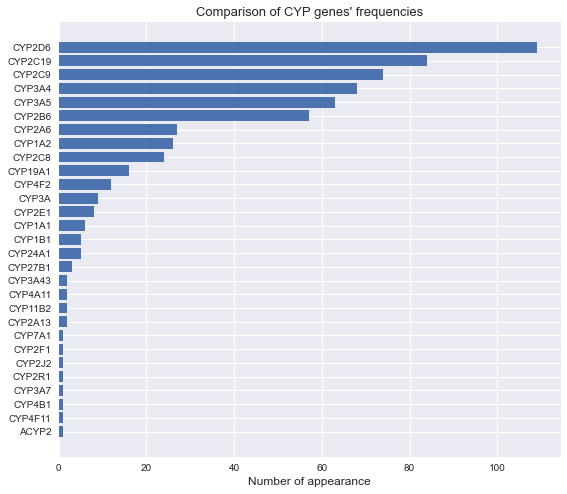

In [37]:
# group on the column `gene`
cyps_grouped_by_gene = cyps.groupby('Gene').size().sort_values()

# display the figure
plt.figure(figsize = (9, 8))
plt.barh(cyps_grouped_by_gene.index, cyps_grouped_by_gene)
plt.title('Comparison of CYP genes\' frequencies', fontsize = 13)
plt.xlabel('Number of appearance', fontsize = 12)
plt.show()

As we can see from our bar chart, the first 6 CYP genes are nearly twice more represented from the rest of CYPs, i.e there are more variant - drug annotations in the literature for them. 

Now, let's filter out these 6 most common CYPs and make them main subject of our subsequent analysis. 

In [38]:
most_common_genes = 'CYP2D6|CYP2C19|CYP2C9|CYP3A4\Z|CYP3A5|CYP2B6'

In [39]:
cyps_most_common_genes = clinical_annotation_metadata[clinical_annotation_metadata['Gene'].str.contains(most_common_genes)]

In [40]:
cyps_most_common_genes

,Clinical Annotation ID,Location,Gene,Level of Evidence,Clinical Annotation Types,Genotype-Phenotype IDs,Annotation Text,Variant Annotations IDs,Variant Annotations,PMIDs,Evidence Count,Related Chemicals,Related Diseases,Biogeographical Groups,Chromosome
7,1448999716,"CYP2D6*1, CYP2D6*10, CYP2D6*87, CYP2D6*88, CYP...",CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
39,1449718265,rs12248560,CYP2C19,3,Toxicity/ADR,1449718267;1449718268;1449718269,CC:Patients with the CC genotype and breast ca...,1449718012,Genotype CC is associated with increased ris...,29507678,1,cyclophosphamide (PA449165);doxorubicin (PA449...,Breast Neoplasms (PA443560),Unknown,chr10
49,981238437,rs1057910,CYP2C9,2A,Toxicity/ADR,981238438;981238439;981238440,AA:Patients with the AA genotype who are treat...,827826832;827826844,Allele C is associated with increased risk o...,14707031;17681167,2,"Antiinflammatory agents, non-steroids (PA16471...",NaN,Unknown,chr10
83,1449005041,rs776746,CYP3A5,3,Metabolism/PK,1449005043;1449005044;1449005045,CC:Pregnant patients infected with malaria and...,1449003493;1449003659,Allele C is associated with increased concen...,28673292,2,lumefantrine (PA165111722),Malaria (PA444859),Sub-Saharan African,chr7
85,1449005047,rs2740574,CYP3A4,3,Efficacy;Metabolism/PK,1449005049;1449005050;1449005051,CC:Pregnant patients with malaria and the CC g...,1449003545;1449003637,Allele C is associated with increased concen...,28673292,2,lumefantrine (PA165111722),Malaria (PA444859),Sub-Saharan African,chr7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4663,1451155020,"CYP2D6*1, CYP2D6*10, CYP2D6*17, CYP2D6*1xN, CY...",CYP2D6,2A,Metabolism/PK,1451208441;1451208442;1451208443;1451208444;14...,*1:Patients carrying the *1 allele in addition...,1183684640;1183684653;1183684657;1183684661;14...,CYP2D6 ultra-metabolizer genotype is associate...,12191703;12893130;14624403;15906019;16368820;1...,34,tramadol (PA451735),NaN,Mixed Population,NaN
4667,1451161878,"CYP2B6*1, CYP2B6*6",CYP2B6,4,Dosage,1451161920;1451161921,*1:Patients with opioid dependence and carryin...,1451161493,CYP2B6 *6/*6 is associated with decreased do...,21589866,1,methadone (PA450401),Opioid-Related Disorders (PA445043),European,NaN
4677,1451208240,"CYP2D6*1, CYP2D6*10",CYP2D6,3,Dosage,1451208242;1451208243,*1:Patients carrying the *1 allele in combinat...,1451208192,CYP2D6 *10/*10 is associated with increased ...,25825958,1,fentanyl (PA449599),NaN,Unknown,NaN
4679,1451208340,"CYP2D6*1, CYP2D6*10, CYP2D6*17, CYP2D6*2, CYP2...",CYP2D6,3,Toxicity/ADR,1451208361;1451208362;1451208363;1451208364;14...,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,ketoprofen (PA450149);tramadol (PA451735),NaN,European,NaN


Our current working DataFrame has reduced to 455 records. 

Now, we will have to tidy up another important column for our analysis, that is the `Location` column. We saw that there is stored information about the variants associated with particular drug. However, this column also contain more than one value (gene variant) per row, that we should split in a similar fashion as we did with the column `Gene`.

Before we do that, let's take a random sample from this column.

In [41]:
cyps_most_common_genes['Location'].sample(20)

586                                            rs12782374
770                                              rs776746
522     CYP2D6*1, CYP2D6*10, CYP2D6*1xN, CYP2D6*2, CYP...
587                                            rs12721655
1708                                            rs4244285
2991                                             rs776746
3741                                            rs4646437
2204                                           rs41303343
2010                                  CYP3A4*1, CYP3A4*22
4662    CYP2D6*1, CYP2D6*1xN, CYP2D6*2xN, CYP2D6*3, CY...
2696                                            rs1065852
3648                                            rs8192719
3708                                  CYP3A4*1, CYP3A4*22
3250                                 CYP2C19*1, CYP2C19*2
619                                             rs2246709
1644                                            rs5030655
4658           CYP2D6*1, CYP2D6*1xN, CYP2D6*2, CYP2D6*2xN
1852          

As we can see nearly all records contain multiple variants. That basically means that the action of certain drug(s) can be infuenced by many alleles of one gene in a similar fashion.  

Now, let's split out these variants and render them as individual records. For that purpose, we will have to use again our `explode_string` function. We will store the expanded DataFrame in new variable.

In [42]:
cyps_most_common = explode_string(cyps_most_common_genes, 'Location', ',')

In [43]:
cyps_most_common

,Clinical Annotation ID,Location,Gene,Level of Evidence,Clinical Annotation Types,Genotype-Phenotype IDs,Annotation Text,Variant Annotations IDs,Variant Annotations,PMIDs,Evidence Count,Related Chemicals,Related Diseases,Biogeographical Groups,Chromosome
0,1448999716,CYP2D6*1,CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
1,1448999716,CYP2D6*10,CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
2,1448999716,CYP2D6*87,CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
3,1448999716,CYP2D6*88,CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
4,1448999716,CYP2D6*89,CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,1451208340,CYP2D6*5,CYP2D6,3,Toxicity/ADR,1451208361;1451208362;1451208363;1451208364;14...,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,ketoprofen (PA450149);tramadol (PA451735),NaN,European,NaN
1259,1451208340,CYP2D6*6,CYP2D6,3,Toxicity/ADR,1451208361;1451208362;1451208363;1451208364;14...,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,ketoprofen (PA450149);tramadol (PA451735),NaN,European,NaN
1260,1451208340,CYP2D6*9,CYP2D6,3,Toxicity/ADR,1451208361;1451208362;1451208363;1451208364;14...,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,ketoprofen (PA450149);tramadol (PA451735),NaN,European,NaN
1261,1451207862,CYP3A5*1,CYP3A5,3,Metabolism/PK,1451207868;1451207869,*1:Patients carrying the *1 allele in combinat...,1451207780,CYP3A5 *1/*1 is associated with decreased ex...,32564268,1,Dabigatran (PA165110351),NaN,Mixed Population,NaN


Our new DataFrame expanded to 1263 records. 

Now, we can check how many unique variants are there in the column `Location`.

In [44]:
cyps_most_common['Location'].nunique()

248

We can do it better. We can see for each of the selected CYP gene, which are those unique variants associated with it.

In [45]:
for gene, gene_variant_data in cyps_most_common.groupby('Gene')['Location']:
    print('=========================')
    print(f'Gene: {gene}')
    print('=========================')
    print(gene_variant_data.unique())

Gene: CYP2B6
['rs3211371' 'CYP2B6*1' ' CYP2B6*5' ' CYP2B6*4' ' CYP2B6*6' ' CYP2B6*7'
 'rs3745274' 'rs12721655' 'rs2279343' 'rs8192709' 'rs8109525' 'rs28399499'
 'rs2279345' 'rs12721646' 'rs7254579' 'rs4802101' 'rs4803419' 'rs58425034'
 ' CYP2B6*18' ' CYP2B6*2' ' CYP2B6*22' 'rs35303484' 'rs2054675'
 'rs3786547' 'CYP2B6*27' ' CYP2B6*28' 'rs8192719' 'rs36118214']
Gene: CYP2C19
['rs12248560' 'rs11188072' 'CYP2C19*1' ' CYP2C19*17' ' CYP2C19*2'
 ' CYP2C19*3' 'rs145119820' 'rs61311738' 'rs1187513719' 'rs4244285'
 ' CYP2C19*4' ' CYP2C19*5' ' CYP2C19*6' ' CYP2C19*8' 'rs28399504'
 'rs11568732' 'rs4986893' 'rs144928727' ' CYP2C19*10' ' CYP2C19*11'
 ' CYP2C19*13' ' CYP2C19*14' ' CYP2C19*15' ' CYP2C19*16' ' CYP2C19*18'
 ' CYP2C19*19' ' CYP2C19*22' ' CYP2C19*23' ' CYP2C19*24' ' CYP2C19*25'
 ' CYP2C19*26' ' CYP2C19*9' ' CYP2C19*7' 'rs12768009' ' CYP2C19*28'
 'rs3814637']
Gene: CYP2C9
['rs1057910' 'CYP2C9*1' ' CYP2C9*3' 'rs1799853' ' CYP2C9*2' 'rs1934969'
 'rs9332096' 'rs4917639' 'rs12782374' 'rs56165

We can even plot the number of the unique variants for each CYP gene. 

For that purpose, we will create a simple bar chart.

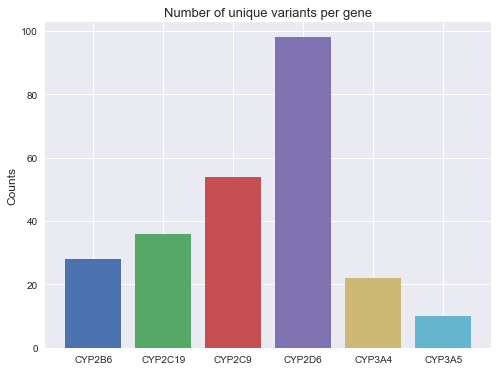

In [46]:
plt.figure(figsize = (8, 6))

for gene, gene_variant_data in cyps_most_common.groupby('Gene'):
    plt.bar(gene, gene_variant_data['Location'].nunique())

plt.title('Number of unique variants per gene', fontsize = 13)
plt.ylabel('Counts', fontsize = 12)
plt.show()

We can see that the gene CYP2D6 has most variants associated with different drugs.

Now, it is interesting to see how spread out are these CYP variants amongst the distinct racial groups. 

In order to find out that, we can group jointly on the columns `Gene` and `Biogeographical Groups`, and then we can use the column `Location` to perform the actual aggregation only on the unique variants for each gene, and for each racial group.    

Let's do that.

In [47]:
cyps_most_common.groupby(['Gene', 'Biogeographical Groups'], as_index = False).agg({'Location': pd.Series.nunique})

,Gene,Biogeographical Groups,Location
0,CYP2B6,African American/Afro-Caribbean,1
1,CYP2B6,East Asian,7
2,CYP2B6,European,7
3,CYP2B6,Mixed Population,16
4,CYP2B6,Sub-Saharan African,2
5,CYP2B6,Unknown,10
6,CYP2C19,East Asian,6
7,CYP2C19,European,8
8,CYP2C19,Mixed Population,16
9,CYP2C19,Sub-Saharan African,2


Since we used the parametar `as_index = False`, we obtained a nice DataFrame with three columns, insted of getting `pd.Series` with `MultiIndex`. 

Now, let's first save this new dataframe in a new variable.

In [48]:
gene_biogeo_group_association = cyps_most_common.groupby(['Gene', 'Biogeographical Groups'], as_index = False).agg({'Location': pd.Series.nunique})

At first glance, we can see that some of the CYP genes are poorly represented in some of the racial groups. Moreover, some of the CYP genes are not presented, at all, in other groups. We can explore that further if we use this new DataFrame and group on `Biogeographical groups` and aggregate on `Location`.

In [49]:
gene_biogeo_group_association.groupby('Biogeographical Groups')['Location'].size().sort_values(ascending = False)

Biogeographical Groups
Unknown                            6
Sub-Saharan African                6
Mixed Population                   6
European                           6
East Asian                         6
African American/Afro-Caribbean    4
in vitro                           2
Latino                             2
Near Eastern                       1
Central/South Asian                1
Name: Location, dtype: int64

As we can see `Near Eastern` and `Central/South Asian` are presented with only one CYP gene, while `Latino` is presented with two CYP genes. On the other hand, we have `in vitro` group, which does not provide any useful information about the racial spread of the CYP genes, while the group `African American/Afro-Caribbean` is presented with four CYP genes, though each of these four genes is represented with only one or two variants. For these reasons, we will exclude all these groups that are not fully represented for each of the CYP genes of interest, and our further analysis will not rely on them.

The remaining groups `East Asian`, `European`, `Mixed Population`, and `Unknown` are fully represented for each of the six CYP genes, although only `East Asian` and `European` can be seen as distinct biogeographical groups which is not very reaviling about the true spread of the varians geographically. However, that is our data and we must act in accordance with it.

Now, we can filter out these fully represented groups and visualize them as a grouped bar chart. 

First, let's create a variable with the groups we will use to filter our `gene_biogeo_group_association` DataFrame.

In [50]:
biogeo_groups = 'East Asian|Europea|Mixed Population|Unknown'

In [51]:
# filter the biogeographical groups of interest

gene_biogeo_group_association[gene_biogeo_group_association['Biogeographical Groups'].str.contains(biogeo_groups)].reset_index(drop = True)

,Gene,Biogeographical Groups,Location
0,CYP2B6,East Asian,7
1,CYP2B6,European,7
2,CYP2B6,Mixed Population,16
3,CYP2B6,Unknown,10
4,CYP2C19,East Asian,6
5,CYP2C19,European,8
6,CYP2C19,Mixed Population,16
7,CYP2C19,Unknown,28
8,CYP2C9,East Asian,9
9,CYP2C9,European,9


As we can see each of the six CYP genes is associated with all four selected biogeographical groups and has intiger representing the number of unique CYP variants per each group. 

Now, we can save this DataFrame in a new variable.

In [52]:
cyps_biogeo_groups = gene_biogeo_group_association[gene_biogeo_group_association['Biogeographical Groups'].str.contains(biogeo_groups)].reset_index(drop = True)

Since we will display a grouped bar chart it is a good idea to take out the data for each CYP gene in separate variable. We will work more easily with them. 

In [53]:
# assigning each CYP gene data to new variables

cyp2b6 = cyps_biogeo_groups.loc[cyps_biogeo_groups.Gene.str.contains('CYP2B6')]
cyp2c19 = cyps_biogeo_groups.loc[cyps_biogeo_groups.Gene.str.contains('CYP2C19')]
cyp2c9 = cyps_biogeo_groups.loc[cyps_biogeo_groups.Gene.str.contains('CYP2C9')]
cyp2d6 = cyps_biogeo_groups.loc[cyps_biogeo_groups.Gene.str.contains('CYP2D6')]
cyp3a4 = cyps_biogeo_groups.loc[cyps_biogeo_groups.Gene.str.contains('CYP3A4')]
cyp3a5 = cyps_biogeo_groups.loc[cyps_biogeo_groups.Gene.str.contains('CYP3A5')]

Now, after we got our new variables, let's display a horizontally grouped bar chart representing the biogeographical spread of the selected CYPs genes in terms of the number of variants for each gene in each biogeographical group.

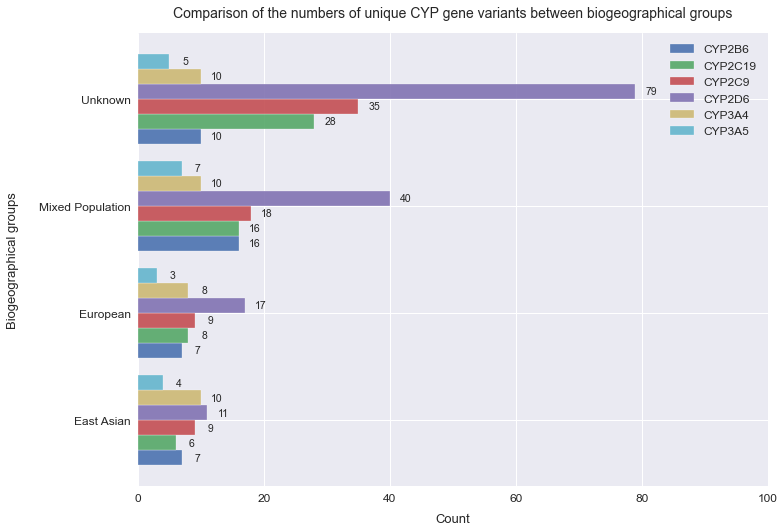

In [54]:
# create the figure, assign a figure title
plt.figure(figsize = (11, 7.5))
figure_title = 'Comparison of the numbers of unique CYP gene variants between biogeographical groups'

# the height of the bars
height = 0.14

# set the location, width, and height of the bars
cyp2b6_plot = plt.barh(np.arange(len(cyp2b6.Location)), cyp2b6.Location, height = height, alpha = 0.9, edgecolor = 'white', label = 'CYP2B6')
cyp2c19_plot = plt.barh([p + height for p in np.arange(len(cyp2c19.Location))], cyp2c19.Location, height = height, alpha = 0.9, edgecolor = 'white', label = 'CYP2C19')
cyp2c9_plot = plt.barh([p + height * 2 for p in np.arange(len(cyp2c9.Location))], cyp2c9.Location, height = height, alpha = 0.9, edgecolor = 'white', label = 'CYP2C9')
cyp2d6_plot = plt.barh([p + height * 3 for p in np.arange(len(cyp2d6.Location))], cyp2d6.Location, height = height, alpha = 0.9, edgecolor = 'white', label = 'CYP2D6')
cyp3a4_plot = plt.barh([p + height * 4 for p in np.arange(len(cyp3a4.Location))], cyp3a4.Location, height = height, alpha = 0.9, edgecolor = 'white', label = 'CYP3A4')
cyp3a5_plot = plt.barh([p + height * 5 for p in np.arange(len(cyp3a5.Location))], cyp3a5.Location, height = height, alpha = 0.9, edgecolor = 'white', label = 'CYP3A5')

# set the arrangement of x-, and yticks
plt.xticks(np.arange(0, 101, 20), fontsize = 12)
plt.yticks([p + 2.5 * height for p in range(len(cyp2b6.Location))], (cyp2c9['Biogeographical Groups'].tolist()), fontsize = 12)

# add title, x-, and ylabels, xlim
plt.title(figure_title, fontsize = 14, pad = 16)
plt.xlabel('Count', fontsize = 13, labelpad = 10)
plt.ylabel('Biogeographical groups', fontsize = 13, labelpad = 20)
plt.xlim(0, 100)

def autolabel(cyps):
    """
    Attach a text label aside each bar in *cyps*, displaying its width.
    """
    for cyp in cyps:
        width = cyp.get_width()
        plt.text(x = cyp.get_width() + 2.5, 
                 y = cyp.get_y() + 0.5 * cyp.get_height(),
                 s = '%d' % int(width), 
                 ha = 'center', 
                 va = 'center',
                 fontsize = 10.5)
    
autolabel(cyp2b6_plot)
autolabel(cyp2c19_plot)
autolabel(cyp2c9_plot)
autolabel(cyp2d6_plot)
autolabel(cyp3a4_plot)
autolabel(cyp3a5_plot)

# display the figure
plt.legend(loc = 'best', fontsize = 12)
plt.tight_layout()
plt.show()

Now, after we got visual presentation for the number of CYP variants amongst the groups, we can form a hypoteses to test if the number of different CYP variants is spread out equally in the distinct biogeographical groups (i.e., the group means are the same) or there is statistically significant difference in the spread amongst the groups. 

In order to find out that we will perform one-way ANOVA. The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test has important assumptions that must be satisfied in order for the associated p-value to be valid, such as each sample to come from normal distribution, and the population standard deviations of the groups to be equal. We do not know if these assumption are satisfied, because our data is scarce, and we do not know anything more about the populations where our samples come from. However, this must not be an issue to perform the test, although we may observe some loss of power of the associated p-value.

Before we run the test, let's first compose a dictionary with keys - our selected CYP genes, and values - the number of CYP variants for each of the biogreographical groups. 

In [55]:
gene_variant_groups = {gene: variant.tolist() for gene, variant in cyps_biogeo_groups.groupby('Gene')['Location']}

Let's see these key - value pairs.

In [56]:
gene_variant_groups

{'CYP2B6': [7, 7, 16, 10],
 'CYP2C19': [6, 8, 16, 28],
 'CYP2C9': [9, 9, 18, 35],
 'CYP2D6': [11, 17, 40, 79],
 'CYP3A4': [10, 8, 10, 10],
 'CYP3A5': [4, 3, 7, 5]}

Now, we can run one-way ANOVA by passing the dictionary values (for the number of biogeographical spread of the CYP variants) as separate arguments to the `scipy.stats` method `f_oneway`. We will get the corresponding p-value calculated from F-statistics which works 'under the hood' of the test. 

Before we do that, let's first form our hypotheses.

* $H_0$: CYP gene variants are equally distributed amongs the biogeographical groups (the means of the groups are equall). 
* $H_1$: CYP gene variants are not equally distributed amongs the groups. Some of the CYP genes are more spread out (have more variants) in given biogeographical group(s).  
* $\alpha_c = 0,05$

In [57]:
print(f'p-value:', st.f_oneway(*gene_variant_groups.values()).pvalue)

p-value: 0.06804418313404897


We got p-value - 0.068 (6.8%) which is higher than our $\alpha_c$, therefore we can not reject the null hypothesis ($H_0$) at significance level 0.05 (5%).

### III. Analysis of the Drugs Associated with the Cytochrome P450 Gene Family

In this section, our analysis will be directed towards exploration of the drugs associated with the genetic variants of CYPs. 

We will begin this analysis with taking out a random sample from the column `Related Chemicals`, where are stored the drugs associated with each variant. 

In [58]:
cyps_most_common['Related Chemicals'].sample(25)

1071                            tolterodine (PA164746757)
1259            ketoprofen (PA450149);tramadol (PA451735)
770                               debrisoquine (PA452616)
855                                  sparteine (PA452610)
129                             atomoxetine (PA134688071)
551                                  methadone (PA450401)
1158                               dipyrone (PA166128206)
263                                mirtazapine (PA450522)
275                                risperidone (PA451257)
1081                             lornoxicam (PA165958395)
407                             tropisetron (PA161925594)
430                               cyclosporine (PA449167)
509                    n-desmethyltamoxifen (PA166127651)
640                                  donepezil (PA449394)
1040    bufuralol (PA166110256);dextromethorphan (PA44...
443     aripiprazole (PA10026);haloperidol (PA449841);...
1145                                 efavirenz (PA449441)
888           

At a glimpse, this column, likewise the columns `Gene` and `Location`, holds more than one value (drug in this case) per record. Therefore, it needs to be tidied up a bit. Similarly to the columns `Gene` and `Location`, we will split up those rows which holds multiple drugs, and will make from them separate records. Subsequently, we will remove those ID numbers in the brackets.

First, let's use our `explode_string` function to separate those rows that hold multiple values, and store the recieved DataFrame in a new variable.

In [59]:
cyps_related_chemicals = explode_string(cyps_most_common, 'Related Chemicals', ';')

In [60]:
cyps_related_chemicals

,Clinical Annotation ID,Location,Gene,Level of Evidence,Clinical Annotation Types,Genotype-Phenotype IDs,Annotation Text,Variant Annotations IDs,Variant Annotations,PMIDs,Evidence Count,Related Chemicals,Related Diseases,Biogeographical Groups,Chromosome
0,1448999716,CYP2D6*1,CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
1,1448999716,CYP2D6*10,CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
2,1448999716,CYP2D6*87,CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
3,1448999716,CYP2D6*88,CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
4,1448999716,CYP2D6*89,CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,1451208340,CYP2D6*6,CYP2D6,3,Toxicity/ADR,1451208361;1451208362;1451208363;1451208364;14...,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,tramadol (PA451735),NaN,European,NaN
1444,1451208340,CYP2D6*9,CYP2D6,3,Toxicity/ADR,1451208361;1451208362;1451208363;1451208364;14...,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,ketoprofen (PA450149),NaN,European,NaN
1445,1451208340,CYP2D6*9,CYP2D6,3,Toxicity/ADR,1451208361;1451208362;1451208363;1451208364;14...,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,tramadol (PA451735),NaN,European,NaN
1446,1451207862,CYP3A5*1,CYP3A5,3,Metabolism/PK,1451207868;1451207869,*1:Patients carrying the *1 allele in combinat...,1451207780,CYP3A5 *1/*1 is associated with decreased ex...,32564268,1,Dabigatran (PA165110351),NaN,Mixed Population,NaN


Now, let's strip off the ID numbers in the brackets.

In [61]:
cyps_related_chemicals['Related Chemicals'] = cyps_related_chemicals['Related Chemicals'].str.split(' ').str[0]

In [62]:
cyps_related_chemicals['Related Chemicals']

0       risperidone
1       risperidone
2       risperidone
3       risperidone
4       risperidone
           ...     
1443       tramadol
1444     ketoprofen
1445       tramadol
1446     Dabigatran
1447     Dabigatran
Name: Related Chemicals, Length: 1448, dtype: object

Our column looks much more better now. 

We can verify how many unique drugs are associated with the different CYP variants.

In [63]:
cyps_related_chemicals['Related Chemicals'].nunique()

171

We can now group on the column `Related Chemicals` and aggregate on the column `Location` in order to see how many unique genetic variants are associated with given drug.

In [64]:
related_chemicals_cyp_variants = cyps_related_chemicals.groupby('Related Chemicals')['Location'].nunique()

In [65]:
related_chemicals_cyp_variants.sort_values(ascending = False)

Related Chemicals
dextromethorphan        62
bufuralol               46
n-desmethyltamoxifen    42
phenytoin               38
clopidogrel             32
                        ..
erythromycin             1
etoposide                1
etravirine               1
iloperidone              1
indinavir                1
Name: Location, Length: 171, dtype: int64

We can plot the count of the variants for each drug as horizontal bar chart for better presentation. 

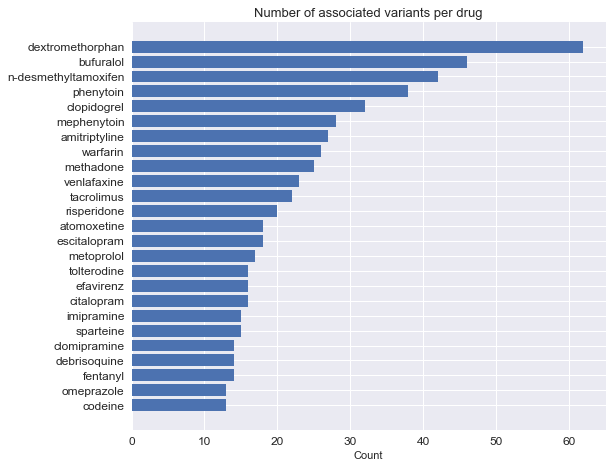

In [66]:
plt.figure(figsize = (8.5, 7.5))

plt.barh(related_chemicals_cyp_variants.sort_values().index[-25:], 
         related_chemicals_cyp_variants.sort_values()[-25:])

plt.title('Number of associated variants per drug', fontsize = 13)
plt.xlabel('Count')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

That plot looks nice, however, in our analysis we will not be interested in exploring the association drug - variant, but rather in exploring just the opposite - for a given genetic variant - which are those drugs linked to it. 

In order to find out that, we must perform the last grouping in reverse order. 

Let's do that.

In [67]:
cyps_related_chemicals.groupby('Location')['Related Chemicals'].nunique().nlargest(25)

Location
CYP2D6*1       62
 CYP2D6*4      49
 CYP2D6*5      38
 CYP2D6*10     36
 CYP2D6*3      34
 CYP2C19*2     32
CYP2C19*1      32
 CYP2D6*6      25
 CYP2D6*1xN    23
 CYP2D6*2      22
 CYP2C19*3     21
rs776746       21
 CYP2C9*3      20
CYP2C9*1       20
 CYP3A5*3      19
CYP3A5*1       19
 CYP2D6*41     18
rs2740574      17
rs3892097      17
 CYP2D6*2xN    16
CYP2B6*1       14
CYP3A4*1       14
 CYP2B6*6      13
 CYP2C19*17    13
 CYP2C9*2      13
Name: Related Chemicals, dtype: int64

We can see from the Series we got, which are those variants with most drugs linked to them. We can also see that some of the variants begin with white space, which is annoying, so we will strip them off.

In [68]:
cyps_related_chemicals['Location'] = cyps_related_chemicals['Location'].str.strip()

We can now do something else. We will use the column `Level of Evidence` to access those variant - drug pairs which have level of evidence '1A' or '1B'. Thus, we will filter out the variant - drug pairs with the most significant level of evidence in the literature.

Let's do that filtering.

In [69]:
# filter variant-drug pairs with level of evince 1A and 1B and display the number of drugs per each genetic variant

cyps_related_chemicals[cyps_related_chemicals['Level of Evidence'].str.contains('1')].groupby('Location')['Related Chemicals'].nunique().nlargest(25)

Location
CYP2D6*1      12
CYP2D6*3      10
CYP2D6*4      10
CYP2D6*5      10
CYP2C9*1       8
CYP2C9*3       8
CYP2D6*1xN     8
CYP2D6*2xN     8
CYP2D6*6       8
rs3892097      8
CYP2C9*2       7
CYP2D6*10      7
CYP2D6*2       7
CYP2C19*1      6
CYP2C19*2      6
CYP2C19*3      6
CYP2C19*17     4
CYP2C19*4      3
rs1057910      3
CYP2C9*13      2
CYP2D6*17      2
CYP2D6*41      2
rs4244285      2
CYP2B6*1       1
CYP2B6*6       1
Name: Related Chemicals, dtype: int64

Now, let's save the filtered DataFrame in new variable.

In [70]:
cyps_related_chemicals_level_1 = cyps_related_chemicals[cyps_related_chemicals['Level of Evidence'].str.contains('1')].groupby('Location') 

From now on, our analysis will be heading to accessing those drugs associated with the most numerously represented variant - CYP2D6\*1. 

Before we acquire these drugs, let's print all drugs associated with CYP variants which are ranked as Level 1, according to the curators of PharmGKB.

In [71]:
for cyp_variant, data in cyps_related_chemicals_level_1:
    print('===============================')
    print(f'Variant: {cyp_variant}')
    print('===============================')
    print(f'Related Chemicals:')
    print(data['Related Chemicals'].unique(), end = '\n\n')

Variant: CYP2B6*1
Related Chemicals:
['efavirenz']

Variant: CYP2B6*6
Related Chemicals:
['efavirenz']

Variant: CYP2C19*1
Related Chemicals:
['clopidogrel' 'sertraline' 'citalopram' 'escitalopram' 'amitriptyline'
 'voriconazole']

Variant: CYP2C19*17
Related Chemicals:
['citalopram' 'escitalopram' 'amitriptyline' 'voriconazole']

Variant: CYP2C19*2
Related Chemicals:
['clopidogrel' 'sertraline' 'citalopram' 'escitalopram' 'amitriptyline'
 'voriconazole']

Variant: CYP2C19*3
Related Chemicals:
['clopidogrel' 'sertraline' 'citalopram' 'escitalopram' 'amitriptyline'
 'voriconazole']

Variant: CYP2C19*4
Related Chemicals:
['clopidogrel' 'citalopram' 'escitalopram']

Variant: CYP2C19*5
Related Chemicals:
['clopidogrel']

Variant: CYP2C19*6
Related Chemicals:
['clopidogrel']

Variant: CYP2C19*8
Related Chemicals:
['clopidogrel']

Variant: CYP2C9*1
Related Chemicals:
['phenytoin' 'flurbiprofen' 'tenoxicam' 'piroxicam' 'lornoxicam'
 'meloxicam' 'ibuprofen' 'warfarin']

Variant: CYP2C9*11
Rela

Now, let's access the drugs associated with CYP2D6\*1. 

For that purpose, we will create an empty list and will iterate over our grouped obeject - `cyps_related_chemicals_level_1` to access and extract the drugs linked to CYP2D6\*1. 

In [72]:
related_chemicals = []

for cyp_variant, data in cyps_related_chemicals_level_1:
    if cyp_variant == 'CYP2D6*1':
        related_chemicals.append(data['Related Chemicals'].unique())

Let's see what we got.

In [73]:
related_chemicals

[array(['fluvoxamine', 'codeine', 'amitriptyline', 'atomoxetine',
        'doxepin', 'paroxetine', 'trimipramine', 'nortriptyline',
        'ondansetron', 'tropisetron', 'clomipramine', 'tramadol'],
       dtype=object)]

It seems that everything is all right, however, if we think a little about what we did, we will realize that we created a empty list, then we iterated over our grouped object and appended a whole list of related drugs to our empty list, so we basically got a list of list. 

Our aim from now on will be to make a named `pd.Series` object, which we will use to join to other dataset, from which we will evaluate the adverse reactions of the drugs associated with CYP2D6\*1.

In order to do that, we first have to flatten our variable `related_chemicals`. We can do that in two ways. In the much more complicated way we may iterate in a nested for loop throughout the variable in order to access and extract the drugs and make a `pd.Series` from them. In the much easier way, we may just pick up the first element, and use it to create a `pd.Series`. 

Let's do this the easy way. 

In [74]:
cyp2d6_related_chemicals = pd.Series(related_chemicals[0], name = 'CYP2D6*1')

In [75]:
cyp2d6_related_chemicals

0       fluvoxamine
1           codeine
2     amitriptyline
3       atomoxetine
4           doxepin
5        paroxetine
6      trimipramine
7     nortriptyline
8       ondansetron
9       tropisetron
10     clomipramine
11         tramadol
Name: CYP2D6*1, dtype: object

As we mentioned, we will use this named Series object to join to other dataset. 

This new dataset holds infromation about the adverse drug reactions of thousand of drugs. 

The dataset is retrieved from related projects to PharmGKB and it is stored in the Stanford digital repository.

Let's now read this dataset. 

In [76]:
off_sides = pd.read_table('Data/3003377s-offsides.tsv')

In [77]:
off_sides

,stitch_id,drug,umls_id,event,rr,log2rr,t_statistic,pvalue,observed,expected,bg_correction,sider,future_aers,medeffect
0,CID000000076,dehydroepiandrosterone,C0000737,abdominal pain,2.250000,1.169925,6.537095,6.156712e-07,9,4.000000,0.002849,0,0,0
1,CID000000076,dehydroepiandrosterone,C0001622,hyperadrenalism,11.000000,3.459432,4.782699,1.644408e-03,2,0.181818,0.000041,0,0,0
2,CID000000076,dehydroepiandrosterone,C0001623,adrenal insufficiency,2.200000,1.137504,4.315199,9.884952e-03,2,0.909091,0.002491,0,0,0
3,CID000000076,dehydroepiandrosterone,C0002792,anaphylactic reaction,2.588235,1.371969,4.590918,3.355380e-03,4,1.545455,0.000503,0,0,0
4,CID000000076,dehydroepiandrosterone,C0002940,aneurysm,7.333333,2.874469,4.598374,3.399457e-03,2,0.272727,0.000135,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438796,CID011980859,bleomycin sulfate,C1869066,hypovolaemic shock,5.076923,2.343954,6.976299,1.337393e-07,6,1.181818,0.000338,0,0,0
438797,CID011980859,bleomycin sulfate,C2242529,stem cell transplant,4.400000,2.137504,11.800431,3.370766e-18,16,3.636364,0.001934,0,0,0
438798,CID011980859,bleomycin sulfate,C2363744,epstein-barr virus associated lymphoproliferat...,3.000000,1.584963,4.665783,3.752785e-03,3,1.000000,0.000629,0,0,0
438799,CID011980859,bleomycin sulfate,C2363799,oxygen saturation abnormal,7.333333,2.874469,5.551510,9.547621e-05,2,0.272727,0.000037,0,0,0


First, we can verify the dimensionality of our new DataFrame.

In [78]:
off_sides.shape

(438801, 14)

Now, let's see the dtypes of the columns.

In [79]:
off_sides.dtypes

stitch_id         object
drug              object
umls_id           object
event             object
rr               float64
log2rr           float64
t_statistic      float64
pvalue           float64
observed           int64
expected         float64
bg_correction    float64
sider              int64
future_aers        int64
medeffect          int64
dtype: object

From this dataset we will use the column `drug` to merge and, at the same time, to filter the dataset with our CYP2D6\*1 associated drugs. Subsequently, we will use the column `rr` to evaluate the relative risk of the adverse events associated with each drug.

Before we do that, let's check out how many unique drugs are listed in this dataset. 

In [80]:
off_sides['drug'].nunique()

1332

This dataset holds information about the adverse reactions for 1332 drugs, which is slightly above the half of all approved small molecule drugs (2637). 

Now, let's do the merge. 

In [81]:
# merge sorted Series object with off_sides DataFrame

cyp2d6_drugs_off_sides = pd.merge(left = cyp2d6_related_chemicals.sort_values(), 
                                  right = off_sides, 
                                  left_on = 'CYP2D6*1', 
                                  right_on = 'drug', 
                                  how = 'left')

In [82]:
cyp2d6_drugs_off_sides

,CYP2D6*1,stitch_id,drug,umls_id,event,rr,log2rr,t_statistic,pvalue,observed,expected,bg_correction,sider,future_aers,medeffect
0,amitriptyline,CID000002160,amitriptyline,C0000735,abdominal neoplasm,11.000000,3.459432,5.088161,1.317479e-03,2,0.181818,0.000096,0,0,0
1,amitriptyline,CID000002160,amitriptyline,C0000737,abdominal pain,1.833333,0.874469,10.385167,4.839023e-15,37,20.181818,0.000862,0,1,1
2,amitriptyline,CID000002160,amitriptyline,C0000833,abscess,3.333333,1.736966,8.213117,4.727203e-10,10,3.000000,0.000191,0,0,0
3,amitriptyline,CID000002160,amitriptyline,C0001261,actinomycosis,4.583333,2.196397,5.582193,1.514727e-04,5,1.090909,0.000272,0,0,0
4,amitriptyline,CID000002160,amitriptyline,C0001418,adenocarcinoma,2.693878,1.429684,7.073039,1.355906e-07,12,4.454545,0.005190,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6358,tropisetron,CID000005595,tropisetron,C1621958,glioblastoma multiforme,2.750000,1.459432,4.561288,3.853288e-03,4,1.454545,0.001671,0,0,0
6359,tropisetron,CID000005595,tropisetron,C1869066,hypovolaemic shock,5.500000,2.459432,5.260516,2.226400e-04,4,0.727273,0.000371,0,0,0
6360,tropisetron,CID000005595,tropisetron,C1963916,neuropathic pain,11.000000,3.459432,5.795204,2.271312e-05,3,0.272727,0.000081,0,0,0
6361,tropisetron,CID000005595,tropisetron,C2242544,congenital tricuspid valve incompetence,2.933333,1.552541,4.119299,2.097746e-02,4,1.363636,0.000136,0,0,0


First, we can see that we reduced the number of rows from 438801, initially, to 6363 after the merging. 

Now, as we will use the column `rr` to evaluate the relative risk for all adverse reactions associated with each CYP2D6\*1 associated drug, we can explore more thoroughly this column as displaying descriptive statistics for the values stored in it. 

In [83]:
cyp2d6_drugs_off_sides[['rr']].describe()

,rr
count,6363.000000
mean,6.219879
std,3.356025
min,0.018108
25%,3.000000
50%,6.000000
75%,9.166667
max,11.000000


We can see that the rr-values range in the interval 0.02 to 11 with a mean around 6. 

But what does that rr mean?

$rr$ stands for relative risk or risk ration and it is used in the statistical analysis of data collected from randomized  controlled  trials (RCTs), cohort studies, or case-control studies to estimate the strength of the association between treatments (or risk factors), and outcomes. It represent the ratio of the probability of an outcome to be expressed in an exposed group to the probability of an outcome to be expressed in an unexposed group. In simple words, $rr$ measures the association between the exposure and the outcome. It is computed as $I_e / I_u$, where $I_e$ is the incidence in the exposed group, and $I_u$ is the incidence in the unexposed group. $rr$ is almost invariably expressed as a ratio to denominator 1 rather than as a percentage. 

Values of $rr$ can be interpreted as follows:

* $rr$ = 1 means that exposure does not affect the outcome

* $rr$ < 1 means that the risk of the outcome is decreased by the exposure

* $rr$ > 1 means that the risk of the outcome is increased by the exposure

Let's provide for example hypothetical RCT in which 76 depressed patients were randomly assigned to receive either  venlafaxine (n = 40) or placebo (n = 36) for 8 weeks. During the trial, new-onset sexual dysfunction was identified in 8 patients treated with venlafaxine and in 3 patients treated with placebo. In order to assess the relative risk, we first have to assess the absolute risk of the event. The  absolute  risk  of  an  event  is  estimated  as  the  number  of  individuals  who  actually  experience  the  event  divided  by  the  total number of individuals exposed to the risk of that event. This figure is usually expressed as a percentage. In our example, because 40 patients took venlafaxine and because 8 of them developed sexual dysfunction, the absolute risk of sexual dysfunction with venlafaxine is 8/40, or 20.0%. Similarly, the absolute risk of developing sexual dysfunction with placebo is 3/36, or 8.3%. We can now calculate the relative risk by simply dividing 20/8.3 which is equal to 2.40.   

Now, after we got an idea what is $rr$, we can plot histograms using these values in order to find out their respective distributions for each drug. Generally, the column `log2rr` it could also be used, because it stores a logarithm to the base 2 of the $rr$ values. However, there is no significant difference in the distributions, as excluding the scale, so we will stick to `rr`. 

Before plotting the histograms, let's see how many associated adverse reactions are there for each drug.

In [84]:
cyp2d6_drugs_off_sides.groupby('drug')['rr'].size()

drug
amitriptyline     535
atomoxetine       651
clomipramine      418
codeine           616
doxepin           882
fluvoxamine       304
nortriptyline    1111
ondansetron       371
paroxetine        689
tramadol          425
trimipramine      214
tropisetron       147
Name: rr, dtype: int64

We can see that the number of adverse reaction for each drug is different. We will plot histograms for each drug using all values (we will not subsample them), however, we will 'hardcore' the y-axis to some constant to make the scale equal for each plot in order to get better visual presentation for the distributions (and the unequal sample sizes) of the drugs. In addition, we will print the skewness for each distribution because all of them are asymmetrical.   

Let's do these plots.

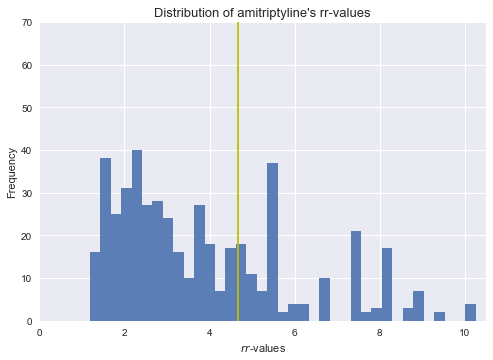

The skewness of the distribution of amitriptyline: 0.9731476571555219


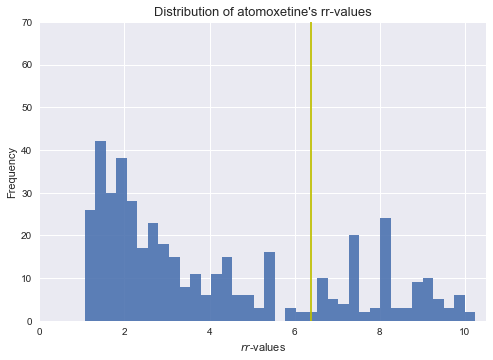

The skewness of the distribution of atomoxetine: 0.026408867303526352


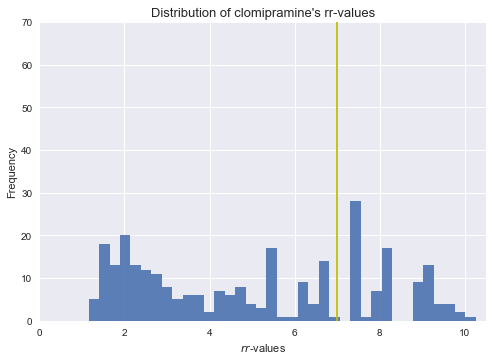

The skewness of the distribution of clomipramine: -0.2156616258763904


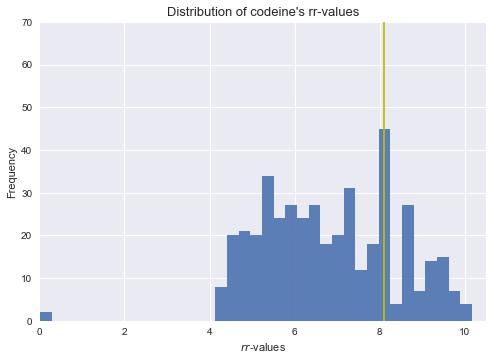

The skewness of the distribution of codeine: -0.08822413939641047


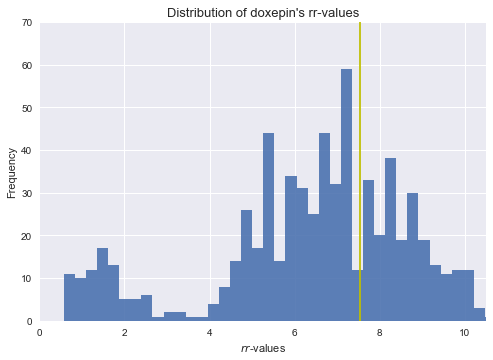

The skewness of the distribution of doxepin: -0.544624559571815


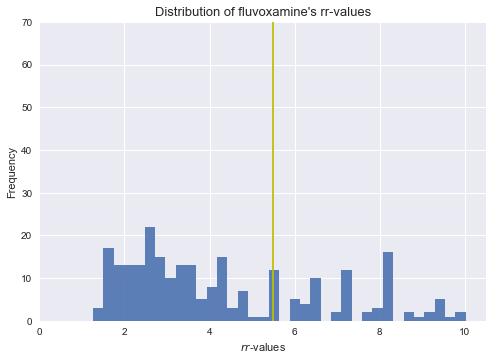

The skewness of the distribution of fluvoxamine: 0.5562778576447736


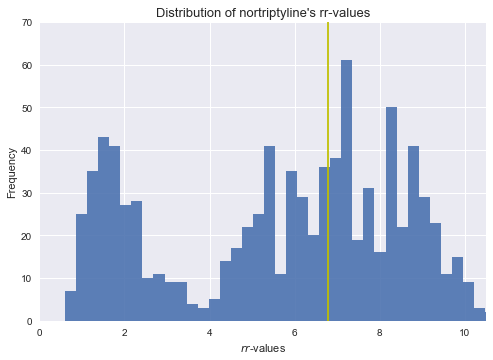

The skewness of the distribution of nortriptyline: -0.3198670116717572


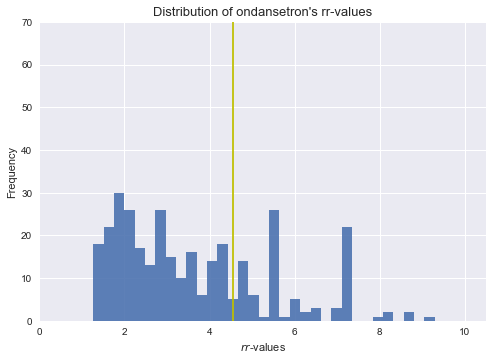

The skewness of the distribution of ondansetron: 1.1012939654037304


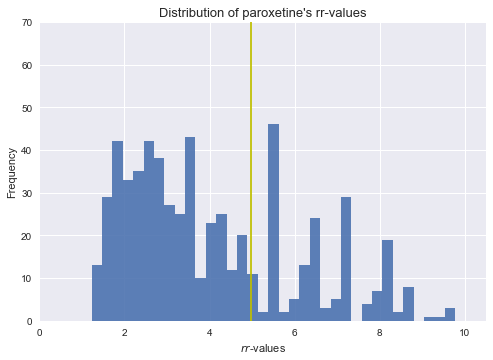

The skewness of the distribution of paroxetine: 0.8639784912001205


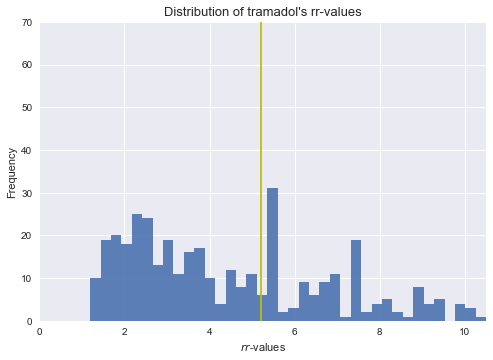

The skewness of the distribution of tramadol: 0.6615557268103734


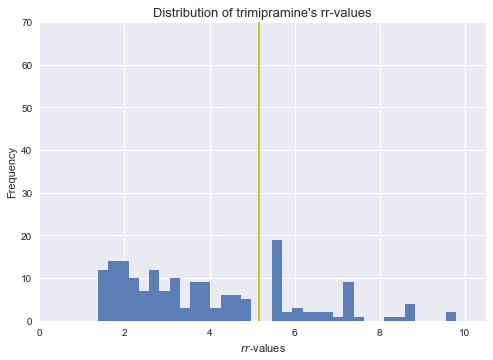

The skewness of the distribution of trimipramine: 0.7539854420839388


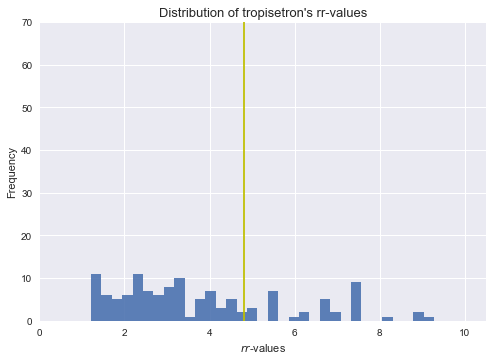

The skewness of the distribution of tropisetron: 0.913339101493153


In [85]:
for drug, drug_data in cyp2d6_drugs_off_sides.groupby('drug'):
    plt.hist(drug_data['rr'], bins = 40, alpha = 0.9)
    plt.axvline(drug_data['rr'].mean(), c = 'y')
    plt.title(f'Distribution of {drug}\'s rr-values', fontsize = 13)
    plt.ylim(0, 70)
    plt.xlim(0, 10.5)
    plt.xlabel('$rr$-values')
    plt.ylabel('Frequency')
    plt.show()
    print(f'The skewness of the distribution of {drug}:', st.skew(drug_data['rr']))

Looking at these plots, we can not find some central tendency or something resembling a Gaussian distribution. The shape of the most ditributions is asymmetrical with moderate to high skewness. Only for those distributions with skewness value between -0.5 and 0.5 we can say that they are simetrical (nortriptyline, codeine, atomoxetine, and clomipramine). 

Interestingly, many distributions have the most values in the bins scoping the interval from 10 to 11. As we already explained, the rr-values represent the probability of occurance of adverse drug reaction, where higher values indicate greatter probability of observing the reaction. Therefore, we may conclude that in these bins are placed the most characteristic adverse drug reactions for each drug. It is interesting to be seen which are these characteristic drug reaction, however, before we do that let's do another plot, this time box plot, since this is the other way do display the distributions of continuous variables. We can show the distributions on one plot, which in our case with 12 distributions is easier for interpretation. 

Let's make this plot.

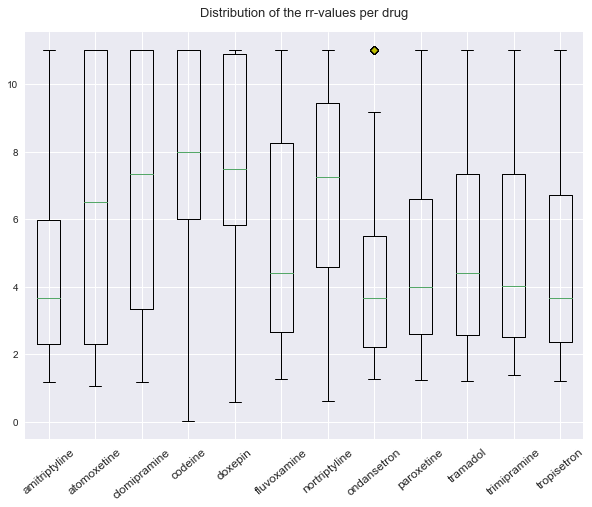

In [86]:
# specifies the style of the fliers
green_diamond = dict(markerfacecolor = 'y', marker='D')

# set the labels
labels = [drug_name for drug_name, _ in cyp2d6_drugs_off_sides.groupby('drug')]

plt.figure(figsize = (10, 7.5))
plt.boxplot([drug_data['rr'] for _, drug_data in cyp2d6_drugs_off_sides.groupby('drug')],
            flierprops = green_diamond)

plt.title('Distribution of the rr-values per drug', fontsize = 13, pad = 16)
plt.xticks(np.arange(1, 13, step = 1), labels = labels, rotation = 40, fontsize = 12)
plt.show()

Now, as we said, we may display all those characteristic adverse reactions for each drug. 

In [87]:
for drug, drug_data in cyp2d6_drugs_off_sides[cyp2d6_drugs_off_sides['rr'] >= 10].groupby('drug'):
    print('========================================================')
    print(drug)
    print('========================================================')
    print(drug_data['event'])

amitriptyline
0                  abdominal neoplasm
5                 adjustment disorder
43     central venous catheterisation
84                       episcleritis
89                   felty's syndrome
                    ...              
488            infusion site bruising
490                infusion site rash
497      cardiovascular insufficiency
501       bowel movement irregularity
522            injection site dryness
Name: event, Length: 63, dtype: object
atomoxetine
537                          abdominal mass
540                           adenoidectomy
541                                 adenoma
557             beckwith-wiedemann syndrome
559                              human bite
                       ...                 
1170                           renal injury
1174    aspartate aminotransferase abnormal
1177              psychiatric investigation
1180                         vascular graft
1184               cholestatic liver injury
Name: event, Length: 218, dtype: 

We can now direct towards testing some hypotheses about the distibutions of our drugs. However, before we do that, let's explore more closely what types of drugs we have deal with. 

In our list of 12 drugs, 7 of them are classified as tricyclic antidepressants (amitriptyline, atomoxetine, clomipramine, doxepin, nortriptyline, paroxetine, trimipramine). Fluvoxamine belongs to the group of the selective serotonin reuptake inhibitors (SSRI), which are more modern class of antidepressants with fewer adverse drug reactions, which can also be seen from the data we have. Both codeine and tramadol belong to the group of opioid analgesics and are used to treat moderate to moderately severe pain. The last two drugs - ondansetron and tropisetron belong to the group of the so called setrons or 5-HT$_3$ antagonists. These are a class of drugs that act as antiemetics, and are considered the gold standard in controlling the nausea and vomiting produced by cancer chemotherapy. 

To sum up, we have 3 classes of drugs - antidepressants, opiod analgestics, and setrons. All of them have continuous distribution of the dependant variable - `rr`. Therefore, we may use independant samples $t$ test to compare the means of the drugs in each of these 3 classes. 

An independant samples $t$ test is a statistical hypothesis test that is used to analyze two samples means. The null hypothesis ($H_0$) and alternative hypothesis ($H_1$) of the test can be expressed as follows:

* $H_0$: µ1 = µ2 - the two population means are equal 

* $H_1$: µ1 ≠ µ2 - the two population means are not equal

Since we have 3 classes, we will approach the testing as follows:

First, we will draw out the rr-values for each drug from the setrons and opioid classes in separate variables.

Next, we will compare the means of the samples in every class. For the classes of the setrons and opioid analgestics that will be easy as there are only two drugs in each class. For the antidepressants class we will use a for loop to iterate over the drugs, and will test each drug to each other in the class. 

Let's walk through this.

First, we will define a function that extracts the rr-values.

In [88]:
def extract_rr(dataframe, drug):
    """
    Extract the rr-values for a drug. 
    """
    drug_column = 'drug'
    rr_column = 'rr'
    rr_values = [rr_value for rr_value, _ in dataframe[dataframe[drug_column] == drug].groupby(rr_column)]
    
    return rr_values

We can now use this function to extract the rr-values for tropisetron and ondansetron.

In [89]:
tropisetron = extract_rr(cyp2d6_drugs_off_sides, 'tropisetron')
ondansetron = extract_rr(cyp2d6_drugs_off_sides, 'ondansetron')

Now, we can use the `scipy.stats` method `ttest_ind` to test if the means of the setrons - tropisetron and ondansetrons are equal ($H_0$) or not ($H_1$). 

* $\alpha_c$ = 0,05

In [90]:
print(f'p-value:', st.ttest_ind(tropisetron, ondansetron).pvalue)

p-value: 0.021191854545595183


We got p-value - 0.021 (2.1%) which is lower than our $\alpha_c$, therefore we can reject the null hypothesis ($H_0$) at significance level 0.05 (5%).

Now, let's test the opioid class. 

First, we must take out the values for codeine and tramadol, repectively.

In [91]:
codeine = extract_rr(cyp2d6_drugs_off_sides, 'codeine')
tramadol = extract_rr(cyp2d6_drugs_off_sides, 'tramadol')

Our hypotheses are the same for the opioid class. $\alpha_c$ = 0,05

In [92]:
print(f'p-value:', st.ttest_ind(codeine, tramadol).pvalue)

p-value: 3.8495082084287395e-23


The p-value we got is far below our $\alpha_c$, so we can reject the null hypothesis ($H_0$) at significance level 0.05 (5%).

Now, for the antidepressants class we will approach the testing similarly as we did with the ANOVA test. First, we will create a dictionary with the rr-values of each antidepressant, then as we said we will iterate over the the drugs (the keys of the dictionary) and will test each drug to each other.

Hypotheses - $H_0$: the two population means are equal, $H_1$: the two population means are not equal. $\alpha_c$ = 0,05.

In [93]:
antidepressants = ['amitriptyline', 'atomoxetine', 'clomipramine', 'doxepin',
                   'fluvoxamine', 'nortriptyline', 'paroxetine', 'trimipramine']

In [94]:
antidepressants_rr = {drug: drug_data['rr'].tolist() for drug, drug_data in cyp2d6_drugs_off_sides.groupby('drug') \
                      if drug in antidepressants}

In [95]:
for drug_one in antidepressants_rr.keys():
    for drug_two in antidepressants_rr.keys():
        print(f'{drug_one} vs. {drug_two}:', st.ttest_ind(antidepressants_rr[drug_one], antidepressants_rr[drug_two]).pvalue)

amitriptyline vs. amitriptyline: 1.0
amitriptyline vs. atomoxetine: 3.2668060023441185e-16
amitriptyline vs. clomipramine: 2.48402641102786e-26
amitriptyline vs. doxepin: 1.2545101523859028e-65
amitriptyline vs. fluvoxamine: 0.00020107266320709444
amitriptyline vs. nortriptyline: 7.427907242407256e-35
amitriptyline vs. paroxetine: 0.08845557026727853
amitriptyline vs. trimipramine: 0.0453813342841976
atomoxetine vs. amitriptyline: 3.2668060023441185e-16
atomoxetine vs. atomoxetine: 1.0
atomoxetine vs. clomipramine: 0.009708678810274091
atomoxetine vs. doxepin: 2.79580947074336e-11
atomoxetine vs. fluvoxamine: 0.0007758570734328315
atomoxetine vs. nortriptyline: 0.01857271597381732
atomoxetine vs. paroxetine: 1.7613855828591648e-13
atomoxetine vs. trimipramine: 5.2946268484779416e-05
clomipramine vs. amitriptyline: 2.48402641102786e-26
clomipramine vs. atomoxetine: 0.009708678810274091
clomipramine vs. clomipramine: 1.0
clomipramine vs. doxepin: 0.0030574140966364276
clomipramine vs. fl

As we got many p-values we will not interpret all of them, we will only say that there are some that are below our $\alpha_c$, hence we can reject the null hypothesis for them at significance level 0.05 (5%).

### IV.  TF-IDF Analysis of the Cytochrome P450 Associated Clinical Phenotypes

So far in this project we have dealt with exploratary data analysis coupled with hypotheses testing. In this section, we will deviate from this approach and will focus more on text analysis. For that purpose we will use one particular numerical statistics named ___tf-idf___. The term _tf-idf_ stands for _term frequency-inverse document frequency_. This is a technique intended to reflect how import a word is to a document in a collection of documents called text corpus. It is often used as a weighting factor in searches of information retrieval and text mining. The goal of using _tf-idf_ is to scale down the impact of words (terms) that occur very frequently in a given corpus and that are hence empirically less informative than terms that occur in a small fraction of the corpus.

In our case the corpus will be the clinical phenotypes of all pharmacogenes deposited in PharmGKB. These phenotypes are housed in separate dataset available through the PharmGKB website. 

In a nutshell, our work from now on will be related with loading that dataset, accessing the clinical phenotypes associated with the Cytochrome P450 genes, extracting all other phenotypes, scoring the realative importance of the words in CYPs associated phenotypes and the rest of phenotypes using _tf-idf_ , and comparing these scores to find out those words that are unique for the CYPs associated phenotypes. 

After we pictured our successive work, let's start out with reading this clinical phenotypes' dataset.

In [96]:
clinical_phenotypes = pd.read_table('Data/clinical_ann.tsv')

In [97]:
clinical_phenotypes

,Genotype-Phenotype ID,Genotype,Clinical Phenotype
0,1447963976,CC,Patients with genotype CC may have decreased l...
1,1447963993,AA,Male patients with the AA genotype and specifi...
2,1448106268,AA,Patients with the AA genotype and multiple scl...
3,1449170173,AA,Patients with the AA genotype and who are trea...
4,1450823787,AA,Patients with the AA genotype may be at an inc...
...,...,...,...
14139,1451218400,*2,Patients carrying the *2 allele in combination...
14140,1451218401,*3,Patients carrying the *3 allele in combination...
14141,1451218263,*1,Patients carrying the *1 allele in combination...
14142,1451218264,*3,Patients carrying the *3 allele in combination...


As we can see this dataset contains 3 columns, the first of which holds unique ID number for each genotype - phenotype association. The second column is the very genotype, while in the third column is housed the phenotype information for each genotype. 

Now, we have to access the phenotypes information for the CYP genes. We can do that by using the variable `cyps` where are stored the genotype - phenotype ID numbers for each CYP gene. 

Let's recall what holds this variable.

In [98]:
cyps

,Clinical Annotation ID,Location,Gene,Level of Evidence,Clinical Annotation Types,Genotype-Phenotype IDs,Annotation Text,Variant Annotations IDs,Variant Annotations,PMIDs,Evidence Count,Related Chemicals,Related Diseases,Biogeographical Groups,Chromosome
7,1448999716,"CYP2D6*1, CYP2D6*10, CYP2D6*87, CYP2D6*88, CYP...",CYP2D6,4,Metabolism/PK,1449166659;1449166660;1449166661;1449166662;14...,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
39,1449718265,rs12248560,CYP2C19,3,Toxicity/ADR,1449718267;1449718268;1449718269,CC:Patients with the CC genotype and breast ca...,1449718012,Genotype CC is associated with increased ris...,29507678,1,cyclophosphamide (PA449165);doxorubicin (PA449...,Breast Neoplasms (PA443560),Unknown,chr10
49,981238437,rs1057910,CYP2C9,2A,Toxicity/ADR,981238438;981238439;981238440,AA:Patients with the AA genotype who are treat...,827826832;827826844,Allele C is associated with increased risk o...,14707031;17681167,2,"Antiinflammatory agents, non-steroids (PA16471...",NaN,Unknown,chr10
72,1449718242,rs1056836,CYP1B1,3,Toxicity/ADR,1449718244;1449718245;1449718246,CC:Patients with the CC genotype and breast ca...,1449718142,Genotype CC is associated with increased ris...,29507678,1,cyclophosphamide (PA449165);doxorubicin (PA449...,Breast Neoplasms (PA443560),Unknown,chr2
82,1449005041,rs776746,CYP3A,3,Metabolism/PK,1449005043;1449005044;1449005045,CC:Pregnant patients infected with malaria and...,1449003493;1449003659,Allele C is associated with increased concen...,28673292,2,lumefantrine (PA165111722),Malaria (PA444859),Sub-Saharan African,chr7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4667,1451161878,"CYP2B6*1, CYP2B6*6",CYP2B6,4,Dosage,1451161920;1451161921,*1:Patients with opioid dependence and carryin...,1451161493,CYP2B6 *6/*6 is associated with decreased do...,21589866,1,methadone (PA450401),Opioid-Related Disorders (PA445043),European,NaN
4671,1451163460,"CYP2A6*17, CYP2A6*1A, CYP2A6*2, CYP2A6*9",CYP2A6,3,Metabolism/PK,1451163462;1451163463;1451163464;1451163465,*1A:Patients with two copies of the *1A allele...,1449576398;1451162952,CYP2A6 *17 is not associated with clearance ...,27417511;30706508,2,metronidazole (PA450484),NaN,Mixed Population,NaN
4677,1451208240,"CYP2D6*1, CYP2D6*10",CYP2D6,3,Dosage,1451208242;1451208243,*1:Patients carrying the *1 allele in combinat...,1451208192,CYP2D6 *10/*10 is associated with increased ...,25825958,1,fentanyl (PA449599),NaN,Unknown,NaN
4679,1451208340,"CYP2D6*1, CYP2D6*10, CYP2D6*17, CYP2D6*2, CYP2...",CYP2D6,3,Toxicity/ADR,1451208361;1451208362;1451208363;1451208364;14...,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,ketoprofen (PA450149);tramadol (PA451735),NaN,European,NaN


The unique ID numbers are stored in the column `Genotype-Phenotype IDs`. As we can see this column houses information about multiple CYP variants (genotypes) in its records, so we will have to split these values as separate rows. 

Let's use the `explode_string` function to do that.

In [99]:
explode_string(cyps, 'Genotype-Phenotype IDs', ';')

,Clinical Annotation ID,Location,Gene,Level of Evidence,Clinical Annotation Types,Genotype-Phenotype IDs,Annotation Text,Variant Annotations IDs,Variant Annotations,PMIDs,Evidence Count,Related Chemicals,Related Diseases,Biogeographical Groups,Chromosome
0,1448999716,"CYP2D6*1, CYP2D6*10, CYP2D6*87, CYP2D6*88, CYP...",CYP2D6,4,Metabolism/PK,1449166659,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
1,1448999716,"CYP2D6*1, CYP2D6*10, CYP2D6*87, CYP2D6*88, CYP...",CYP2D6,4,Metabolism/PK,1449166660,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
2,1448999716,"CYP2D6*1, CYP2D6*10, CYP2D6*87, CYP2D6*88, CYP...",CYP2D6,4,Metabolism/PK,1449166661,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
3,1448999716,"CYP2D6*1, CYP2D6*10, CYP2D6*87, CYP2D6*88, CYP...",CYP2D6,4,Metabolism/PK,1449166662,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
4,1448999716,"CYP2D6*1, CYP2D6*10, CYP2D6*87, CYP2D6*88, CYP...",CYP2D6,4,Metabolism/PK,1449166663,*1:Patients with the CYP2D6*1 allele may have ...,1447959180,CYP2D6 *2 + *10 + *87 + *88 + *89 + *90 + *91 ...,26544071,1,risperidone (PA451257),NaN,Unknown,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344,1451208340,"CYP2D6*1, CYP2D6*10, CYP2D6*17, CYP2D6*2, CYP2...",CYP2D6,3,Toxicity/ADR,1451208368,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,ketoprofen (PA450149);tramadol (PA451735),NaN,European,NaN
2345,1451208340,"CYP2D6*1, CYP2D6*10, CYP2D6*17, CYP2D6*2, CYP2...",CYP2D6,3,Toxicity/ADR,1451208369,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,ketoprofen (PA450149);tramadol (PA451735),NaN,European,NaN
2346,1451208340,"CYP2D6*1, CYP2D6*10, CYP2D6*17, CYP2D6*2, CYP2...",CYP2D6,3,Toxicity/ADR,1451208370,*1:Patients carrying the *1 allele in combinat...,1451208260,CYP2D6 *1/*3 + *1/*4 + *1/*5 + *1/*6 + *4/*41 ...,25989235,1,ketoprofen (PA450149);tramadol (PA451735),NaN,European,NaN
2347,1451207862,"CYP3A5*1, CYP3A5*3",CYP3A5,3,Metabolism/PK,1451207868,*1:Patients carrying the *1 allele in combinat...,1451207780,CYP3A5 *1/*1 is associated with decreased ex...,32564268,1,Dabigatran (PA165110351),NaN,Mixed Population,NaN


Now, let's save the resulting DataFrame in a new variable.

In [100]:
cyps_clinical_phenotypes = explode_string(cyps, 'Genotype-Phenotype IDs', ';')

If we verify the dtype of the new column `Genotype-Phenotype IDs` it will be dtype object, since in the original dataset there was stored information about multiple genotype - phenotype IDs. 

We will use this column to merge to the `clinical_phenotypes` dataset, to select the phenotype information about the CYPs. In order to do that, we first have to cast the dtype of the column `Genotype-Phenotype IDs` to intiger.

But first, let's verify the dtype of the original column.

In [101]:
cyps_clinical_phenotypes['Genotype-Phenotype IDs']

0       1449166659
1       1449166660
2       1449166661
3       1449166662
4       1449166663
           ...    
2344    1451208368
2345    1451208369
2346    1451208370
2347    1451207868
2348    1451207869
Name: Genotype-Phenotype IDs, Length: 2349, dtype: object

dtype: object. 

Let's now do the casting.

In [102]:
cyps_clinical_phenotypes['Genotype-Phenotype IDs'] = cyps_clinical_phenotypes['Genotype-Phenotype IDs'].astype(int)

Now, we can do the merging.

In [103]:
# merge the `clinical_phenotypes` dataset with the selected CYPs on the specified columns

merged_cyps_clinical_phenotypes = pd.merge(clinical_phenotypes, cyps_clinical_phenotypes, 
         left_on = 'Genotype-Phenotype ID', 
         right_on = 'Genotype-Phenotype IDs',
         how = 'inner') 

Since we aim to access the information concerning CYPs phenotypes which is stored in our new merged dataset - `merged_cyps_clinical_phenotypes` in the column `Clinical Phenotype`, we will save that column in a new variable, which we will use later to extract the unique words for the CYPs phenotypes. 

In [104]:
cyps_phenotypes = merged_cyps_clinical_phenotypes['Clinical Phenotype']

In [105]:
cyps_phenotypes

0       Patients with the GG genotype may have increas...
1       Patients with the GG genotype may have increas...
2       Patients with the CC genotype may have decreas...
3       Patients with the CT genotype may have decreas...
4       Patients with the TT genotype may have increas...
                              ...                        
2344    Patients carrying the *2 allele in combination...
2345    Patients carrying the *3 allele in combination...
2346    Patients carrying the *1 allele in combination...
2347    Patients carrying the *3 allele in combination...
2348    Patients carrying the *13 allele in combinatio...
Name: Clinical Phenotype, Length: 2349, dtype: object

2349 records related to distinct CYP genotypes (variants).

Now, it is a good idea to clarify something important about the phenotype annotations. First, they are mannualy created from the PharmGKB curators; and second, they represent concise, structered text for the clinical annotation of the given genotype. This means that the annotations are very similar to each other in terms of text (words used). 

But, let's not being wordy and prove the validity of this by taking out 2 annotations and look at their lexical set of words.  

In [106]:
cyps_phenotypes[2]

'Patients with the CC genotype may have decreased but not non-existent risk for osteonecrosis of the jaw in response to bisphosphonates as compared to patients with the TT genotype. Other genetic and clinical factors may also influence adverse responses to bisphosphonates.'

In [107]:
cyps_phenotypes[4]

'Patients with the TT genotype may have increased risk for osteonecrosis of the jaw in response to bisphosphonates as compared to patients with the CC or CT genotype. Other genetic and clinical factors may also influence adverse responses to bisphosphonates.'

As we can see both annotations are with very close set of words. That means that there are words that are characteristics for each annotation. In fact, our aim in this sections is to explore exactly this. Which are those words that are specific for the CYPs phenotypes, and are not present in the rest of the annotations. 

Now, we will focus on extracting these words; first - associated with CYPs phenotypes; and second - associated with the rest of the annotations. 

In order to do that, we will have to define a function that perform this task. This finction will accept as a parametar 
`pd.Series`, and will return all words from that Series. This function will also filter out all semantically meaningless 'stop words'.

Let's define that function.

In [108]:
def extract_words(pd_series):
    """
    Extract all words from a pd.Series object.
    """
    # extract all strings from pd.Series object 
    all_words = [word for word in ' '.join(pd_series.str.lower().tolist()).split() if word.isalpha()]
    
    # assign stopwords
    stop_words = set(stopwords.words('english'))
    
    # remove stopwords 
    list_of_words = [word for word in all_words if word not in stop_words]
    
    return list_of_words

Now, after we obtained our function, let's use it to get all words for the CYPs annotations.

In [109]:
words_cyps = extract_words(cyps_phenotypes)

In [110]:
words_cyps[:100]

['patients',
 'gg',
 'genotype',
 'may',
 'increased',
 'metabolism',
 'paclitaxel',
 'compared',
 'patients',
 'cc',
 'cg',
 'genetic',
 'clinical',
 'factors',
 'may',
 'also',
 'influence',
 'paclitaxel',
 'patients',
 'gg',
 'genotype',
 'may',
 'increased',
 'metabolism',
 'paclitaxel',
 'compared',
 'patients',
 'cc',
 'cg',
 'genetic',
 'clinical',
 'factors',
 'may',
 'also',
 'influence',
 'paclitaxel',
 'patients',
 'cc',
 'genotype',
 'may',
 'decreased',
 'risk',
 'osteonecrosis',
 'jaw',
 'response',
 'bisphosphonates',
 'compared',
 'patients',
 'tt',
 'genetic',
 'clinical',
 'factors',
 'may',
 'also',
 'influence',
 'adverse',
 'responses',
 'patients',
 'ct',
 'genotype',
 'may',
 'decreased',
 'risk',
 'osteonecrosis',
 'jaw',
 'response',
 'bisphosphonates',
 'compared',
 'patients',
 'tt',
 'genetic',
 'clinical',
 'factors',
 'may',
 'also',
 'influence',
 'adverse',
 'responses',
 'patients',
 'tt',
 'genotype',
 'may',
 'increased',
 'risk',
 'osteonecrosis',
 '

In [111]:
len(words_cyps)

59467

We can see which are the words for the CYPs, and how many they are. 

The next step is to extract the words associated with the rest of the annotations. 

This will be a litle bit tricky exercise, because we have already assigned a bunch of variables, and now we will have to reassign some of them to fulfill this our intention. With so many variables, we can easily get entangled, however we are detirmined to do that. 

In short, we will have to use the CYPs filtered DataFrame - `merged_cyps_clinical_phenotypes`, and to set the column `Genotype-Phenotype ID` as the index of the DataFrame, since later on we will use these indices to filter out the `clinical_phenotypes` dataset, in order to exclude all records related to CYPs genotypes. 

Let's see this sequence of steps in action.

First, let's set the `Genotype-Phenotype ID` as our index column.

In [112]:
merged_cyps_clinical_phenotypes.set_index('Genotype-Phenotype ID', inplace = True)

We can now convince that the column `Genotype-Phenotype ID` is our index column.

In [113]:
merged_cyps_clinical_phenotypes

,Genotype,Clinical Phenotype,Clinical Annotation ID,Location,Gene,Level of Evidence,Clinical Annotation Types,Genotype-Phenotype IDs,Annotation Text,Variant Annotations IDs,Variant Annotations,PMIDs,Evidence Count,Related Chemicals,Related Diseases,Biogeographical Groups,Chromosome
Genotype-Phenotype ID,,,,,,,,,,,,,,,,,
655384596,GG,Patients with the GG genotype may have increas...,655384592,rs12721627,CYP3A,3,Dosage,655384596,CC:Patients with the CC genotype may have decr...,655387863,Allele C is associated with decreased metabo...,16890579,1,paclitaxel (PA450761),"Carcinoma, Non-Small-Cell Lung (PA443622);Neop...",East Asian,chr7
655384596,GG,Patients with the GG genotype may have increas...,655384592,rs12721627,CYP3A4,3,Dosage,655384596,CC:Patients with the CC genotype may have decr...,655387863,Allele C is associated with decreased metabo...,16890579,1,paclitaxel (PA450761),"Carcinoma, Non-Small-Cell Lung (PA443622);Neop...",East Asian,chr7
655384601,CC,Patients with the CC genotype may have decreas...,655384597,rs1934951,CYP2C8,3,Toxicity/ADR,655384601,CC:Patients with the CC genotype may have decr...,699638940;827863672,Genotype TT is associated with increased ris...,18594024;21151627,2,Bisphosphonates (PA164712563);pamidronate (PA4...,Multiple Myeloma (PA444985);Osteonecrosis (PA4...,European,chr10
655384600,CT,Patients with the CT genotype may have decreas...,655384597,rs1934951,CYP2C8,3,Toxicity/ADR,655384600,CC:Patients with the CC genotype may have decr...,699638940;827863672,Genotype TT is associated with increased ris...,18594024;21151627,2,Bisphosphonates (PA164712563);pamidronate (PA4...,Multiple Myeloma (PA444985);Osteonecrosis (PA4...,European,chr10
655384599,TT,Patients with the TT genotype may have increas...,655384597,rs1934951,CYP2C8,3,Toxicity/ADR,655384599,CC:Patients with the CC genotype may have decr...,699638940;827863672,Genotype TT is associated with increased ris...,18594024;21151627,2,Bisphosphonates (PA164712563);pamidronate (PA4...,Multiple Myeloma (PA444985);Osteonecrosis (PA4...,European,chr10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451218400,*2,Patients carrying the *2 allele in combination...,1451092460,"CYP2C9*1, CYP2C9*2, CYP2C9*3",CYP2C9,1A,Metabolism/PK,1451218400,*1:Patients carrying the *1 allele in combinat...,1183702710;1183702721;1183702730,CYP2C9 *3 is associated with increased AUC a...,15229460;18992346,3,tenoxicam (PA131890625),NaN,Unknown,NaN
1451218401,*3,Patients carrying the *3 allele in combination...,1451092460,"CYP2C9*1, CYP2C9*2, CYP2C9*3",CYP2C9,1A,Metabolism/PK,1451218401,*1:Patients carrying the *1 allele in combinat...,1183702710;1183702721;1183702730,CYP2C9 *3 is associated with increased AUC a...,15229460;18992346,3,tenoxicam (PA131890625),NaN,Unknown,NaN
1451218263,*1,Patients carrying the *1 allele in combination...,1183703296,"CYP2C9*1, CYP2C9*13, CYP2C9*3",CYP2C9,1A,Metabolism/PK,1451218263,*1:Patients carrying the *1 allele in combinat...,1183703229;1183703238;1183703250;1183703257;11...,CYP2C9 *1/*3 is associated with decreased me...,15764711;16182270,5,lornoxicam (PA165958395),NaN,East Asian,NaN


Now, we will have to do the same with the `clinical_phenotypes` DataFrame. 

We will again set the column `Genotype-Phenotype ID` as our index column.

Let's do it.

In [114]:
clinical_phenotypes.set_index('Genotype-Phenotype ID', inplace = True)

In [115]:
clinical_phenotypes

,Genotype,Clinical Phenotype
Genotype-Phenotype ID,,
1447963976,CC,Patients with genotype CC may have decreased l...
1447963993,AA,Male patients with the AA genotype and specifi...
1448106268,AA,Patients with the AA genotype and multiple scl...
1449170173,AA,Patients with the AA genotype and who are trea...
1450823787,AA,Patients with the AA genotype may be at an inc...
...,...,...
1451218400,*2,Patients carrying the *2 allele in combination...
1451218401,*3,Patients carrying the *3 allele in combination...
1451218263,*1,Patients carrying the *1 allele in combination...


We got this new reassinged DataFrame.

We can now do the filtering of the `clinical_phenotypes` DataFrame, with the indices of our CYPs filtered `merged_cyps_clinical_phenotypes` DataFrame, in order to extract the rest of the annotations. 

In [116]:
# exclude all records that are not present in CYPs DataFrame, based on indices

clinical_phenotypes[~clinical_phenotypes.index.isin(merged_cyps_clinical_phenotypes.index)]

,Genotype,Clinical Phenotype
Genotype-Phenotype ID,,
1447963976,CC,Patients with genotype CC may have decreased l...
1447963993,AA,Male patients with the AA genotype and specifi...
1448106268,AA,Patients with the AA genotype and multiple scl...
1449170173,AA,Patients with the AA genotype and who are trea...
1450823787,AA,Patients with the AA genotype may be at an inc...
...,...,...
1451217563,CT,Patients with the CT genotype may have a decre...
1451217564,TT,Patients with the TT genotype may have a decre...
1451217581,AA,Patients with the AA genotype may require a lo...


We can see the resulting filtered DataFrame. 

Let's save it in a new variable.

In [117]:
clinical_phenotypes_without_cyps = clinical_phenotypes[~clinical_phenotypes.index.isin(merged_cyps_clinical_phenotypes.index)]

Now, after we obtained that new filtered DataFrame, we can save the column `Clinical Phenotype` in a new variable, and subsequently to use this variable to extract the words that are not associated with CYPs phenotypes.

Let's do that.

In [118]:
phenotypes_without_cyps = clinical_phenotypes_without_cyps['Clinical Phenotype']

In [119]:
phenotypes_without_cyps

Genotype-Phenotype ID
1447963976    Patients with genotype CC may have decreased l...
1447963993    Male patients with the AA genotype and specifi...
1448106268    Patients with the AA genotype and multiple scl...
1449170173    Patients with the AA genotype and who are trea...
1450823787    Patients with the AA genotype may be at an inc...
                                    ...                        
1451217563    Patients with the CT genotype may have a decre...
1451217564    Patients with the TT genotype may have a decre...
1451217581    Patients with the AA genotype may require a lo...
1451217582    Patients with the AG genotype may require a lo...
1451217583    Patients with the GG genotype may require a hi...
Name: Clinical Phenotype, Length: 11822, dtype: object

Now, let's use our `extract_words` function to get these words.

In [120]:
words_phenotypes_without_cyps = extract_words(phenotypes_without_cyps)

Let's see these words, and how many they are.

In [121]:
words_phenotypes_without_cyps[:100]

['patients',
 'genotype',
 'cc',
 'may',
 'decreased',
 'likelihood',
 'drug',
 'resistance',
 'treated',
 'antiepileptics',
 'carbamazepine',
 'people',
 'epilepsy',
 'compared',
 'patients',
 'genotype',
 'contradictory',
 'findings',
 'genotype',
 'cc',
 'associated',
 'dose',
 'genetic',
 'clinical',
 'factors',
 'may',
 'also',
 'influence',
 'response',
 'male',
 'patients',
 'aa',
 'genotype',
 'specifically',
 'epilepsy',
 'syndrome',
 'may',
 'decreased',
 'risk',
 'resistance',
 'antiepileptic',
 'treatment',
 'compared',
 'patients',
 'gg',
 'one',
 'study',
 'found',
 'association',
 'variant',
 'resistance',
 'antiepileptic',
 'genetic',
 'clinical',
 'factors',
 'may',
 'also',
 'influence',
 'resistance',
 'patients',
 'aa',
 'genotype',
 'multiple',
 'sclerosis',
 'may',
 'increased',
 'response',
 'treatment',
 'compared',
 'patients',
 'gg',
 'genetic',
 'clinical',
 'factors',
 'may',
 'also',
 'influence',
 'response',
 'patients',
 'aa',
 'genotype',
 'treated',
 '

In [122]:
len(words_phenotypes_without_cyps)

288085

288085, ok.

Now, we will do something alse.

Since our _tf-idf_ analysis will rely on all words in the corpus (all phenotype annotations in our original dataset - `clinical_phenotypes`), we will have to union both list of words and make a new set of words that is unique for the entire dataset. Then, we will use this set of unique words to count the occurence of each word in the 'CYPs-related' and 'not-CYPs-related' documents.

Fortunately, we can easily do that union by using the python set method `union`. 

Let's see what it is all about. 

In [123]:
unique_words = set(words_cyps).union(set(words_phenotypes_without_cyps))

Let's see which are these unique words, and how many they are.

In [124]:
len(unique_words)

2620

We have 2620 unique words in the entire corpus. 

Now, we are approaching to the actual part of our _tf-idf_ analysis. Due to that, we must shed a bit more light on the computational part of the analysis. 

First of all, _tf-idf_ is calculated by multipyling two different metrics: $tf-idf_{t,d, D} = tf_{t,d} \cdot idf_{t, D}$ - where $t$ denotes the terms; $d$ denotes each document; $D$ denotes the collection of documents (corpus). Each of these matrics is calculated as follows:

* __The term frequency__ of a word in a document - that is the number of times a word appears in a document divded by the total number of words in the document. Every document has its own term frequency. 

$$tf_{t,d} = \dfrac{n_{t,d}}{{\sum_n}{n_{t,d}}}$$

* __The inverse document frequency__ of the word across a set of documents. This means, how common or rare a word is in the corpus. The closer it is to 0, the more common a word is. This metric can be calculated by taking the total number of documents, dividing it by the number of documents that contain a word, and calculating the logarithm.

$$idf_t = log\dfrac{N}{df_t}$$

Now, in order to compute _tf-idf_ we must first count the occurance of each unique word in our 'CYPs-related' and 'not-CYPs-related' documents. We can do that counting by making a dictionary with keys - the unique words in the corpus; and 
then by iterating over each document we can count the appearance of each unique word and assign these numbers as values of the dictionary. 

But let's not be verbose and see this in action. We will first count the words in the 'CYPs-related' document.

In [125]:
number_of_words_cyps = dict.fromkeys(unique_words, 0)
for word in words_cyps:
    number_of_words_cyps[word] += 1

We can now see the count of each unique word in our 'CYPs-related' document.

In [126]:
#number_of_words_cyps

Let's now do the same exercise for the 'not-CYPs-related' document. 

In [127]:
number_of_words_phenotypes_without_cyps = dict.fromkeys(unique_words, 0)
for word in words_phenotypes_without_cyps:
    number_of_words_phenotypes_without_cyps[word] += 1

In [128]:
number_of_words_phenotypes_without_cyps

{'dolutegravir': 3,
 'excerice': 0,
 'normalized': 6,
 'increases': 15,
 'velpatasvir': 3,
 'methylene': 9,
 'recommended': 1,
 'propionic': 9,
 'extreme': 6,
 'cilostazol': 0,
 'drink': 3,
 'separate': 17,
 'consumption': 37,
 'propofol': 9,
 'perphanazine': 3,
 'arteriosclerosis': 3,
 'clarithromycin': 0,
 'quinidine': 6,
 'diabetes': 264,
 'constipation': 12,
 'reinforcement': 3,
 'thalidomide': 78,
 'atrasentan': 6,
 'adalimumab': 21,
 'dry': 3,
 'discovery': 24,
 'atrial': 18,
 'hdl': 30,
 'pharmacological': 18,
 'insensitive': 3,
 'e': 0,
 'fatal': 5,
 'entecavir': 3,
 'leukopenia': 103,
 'remission': 104,
 'cystic': 309,
 'record': 0,
 'insulin': 9,
 'fluorescently': 9,
 'schizoaffective': 14,
 'adjust': 0,
 'hypertriglyceridemia': 40,
 'eosinophilia': 4,
 'hydrocodone': 3,
 'offered': 0,
 'measure': 3,
 'comparing': 12,
 'withdrawn': 3,
 'dosing': 1,
 'metronomic': 3,
 'tumours': 3,
 'representing': 56,
 'behaviors': 15,
 'etanercept': 33,
 'analogs': 3,
 'hours': 6,
 'antiepil

Now, we must have define a function that will compute the term frequencies of the words in our documents. 

This function will accepts as parametars - a dictionary with the counted words from a document, and a set of unique words, refered to us as 'bag of words'. Given these parameters the function will compute the term frequencies and will return a new dictionary with the frequencies of each unique word from the corpus.

In [129]:
def compute_tf(word_dict, bag_of_words):
    """
    Compute the term frequency of each word in a document.
    """
    tf_dict = {}
    bag_of_words_count = len(bag_of_words)
    
    #compute tf of each word
    for word, count in word_dict.items():
        tf_dict[word] = count / float(bag_of_words_count)
        
    return tf_dict

Now, let's compute the term frequencies of the words in our 'CYPs-related' document. 

In [130]:
tf_cyps = compute_tf(number_of_words_cyps, unique_words)

We can see these frequencies.

In [131]:
tf_cyps

{'dolutegravir': 0.0,
 'excerice': 0.0019083969465648854,
 'normalized': 0.0026717557251908397,
 'increases': 0.0,
 'velpatasvir': 0.0,
 'methylene': 0.0,
 'recommended': 0.0,
 'propionic': 0.0,
 'extreme': 0.0,
 'cilostazol': 0.0015267175572519084,
 'drink': 0.0,
 'separate': 0.0015267175572519084,
 'consumption': 0.003816793893129771,
 'propofol': 0.003435114503816794,
 'perphanazine': 0.0,
 'arteriosclerosis': 0.0011450381679389313,
 'clarithromycin': 0.0022900763358778627,
 'quinidine': 0.0003816793893129771,
 'diabetes': 0.0030534351145038168,
 'constipation': 0.0,
 'reinforcement': 0.0,
 'thalidomide': 0.0011450381679389313,
 'atrasentan': 0.0,
 'adalimumab': 0.0,
 'dry': 0.0,
 'discovery': 0.0,
 'atrial': 0.004580152671755725,
 'hdl': 0.011450381679389313,
 'pharmacological': 0.0,
 'insensitive': 0.0,
 'e': 0.0057251908396946565,
 'fatal': 0.0,
 'entecavir': 0.0,
 'leukopenia': 0.004961832061068702,
 'remission': 0.016793893129770993,
 'cystic': 0.0,
 'record': 0.002290076335877

We must also compute the term frequencies of the words in our 'not-CYPs-related' document.

In [132]:
tf_phenotypes_without_cyps = compute_tf(number_of_words_phenotypes_without_cyps, unique_words)

In [133]:
tf_phenotypes_without_cyps

{'dolutegravir': 0.0011450381679389313,
 'excerice': 0.0,
 'normalized': 0.0022900763358778627,
 'increases': 0.0057251908396946565,
 'velpatasvir': 0.0011450381679389313,
 'methylene': 0.003435114503816794,
 'recommended': 0.0003816793893129771,
 'propionic': 0.003435114503816794,
 'extreme': 0.0022900763358778627,
 'cilostazol': 0.0,
 'drink': 0.0011450381679389313,
 'separate': 0.0064885496183206106,
 'consumption': 0.014122137404580152,
 'propofol': 0.003435114503816794,
 'perphanazine': 0.0011450381679389313,
 'arteriosclerosis': 0.0011450381679389313,
 'clarithromycin': 0.0,
 'quinidine': 0.0022900763358778627,
 'diabetes': 0.10076335877862595,
 'constipation': 0.004580152671755725,
 'reinforcement': 0.0011450381679389313,
 'thalidomide': 0.029770992366412213,
 'atrasentan': 0.0022900763358778627,
 'adalimumab': 0.00801526717557252,
 'dry': 0.0011450381679389313,
 'discovery': 0.00916030534351145,
 'atrial': 0.006870229007633588,
 'hdl': 0.011450381679389313,
 'pharmacological': 

We must now difine another function that will compute the inverse document frequencies of the words in our 'CYPs-related' and 'not-CYPs-related' documents. 

As we already said the inverse document frequency determines the weights of common and rare words across all documents in the corpus. The rare terms are more informative than frequent term, since they might be used as discriminating factors for these document that they appear in. Hence, we wants low positive weights for frequent terms and high weights for rare terms. That provides for us _idf_. For example, if we have 10 million documents and a given word appears in 1000 of them, then _idf_ is calculated as $IDF = log(10,000,000 / 1,000) = 4$, however if the word appear in only 100 documents, then _idf_ will be equal to 5, which will increase the wight of that word.

Now, this function will accept all documents as parameter, and will return a dictionary with the calculated _idf_ weights for each word.

Let's define it.

In [134]:
def compute_idf(documents):
    """
    Compute the inverse document frequency weight for each word from the provided documents.
    """
    N = len(documents)
    
    # count the number of documents that contain a word
    idf_dict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, value in document.items():
            if value > 0:
                idf_dict[word] += 1
    
    # compute idf weights for each word
    for word, value in idf_dict.items():
        idf_dict[word] = np.log(N / float(value))
        
    return idf_dict

The _idf_ is computed once for all documents.

In [135]:
idfs = compute_idf([number_of_words_cyps, number_of_words_phenotypes_without_cyps])

We can now see the weights of all words in the corpus. 

In [136]:
idfs

{'dolutegravir': 0.6931471805599453,
 'excerice': 0.6931471805599453,
 'normalized': 0.0,
 'increases': 0.6931471805599453,
 'velpatasvir': 0.6931471805599453,
 'methylene': 0.6931471805599453,
 'recommended': 0.6931471805599453,
 'propionic': 0.6931471805599453,
 'extreme': 0.6931471805599453,
 'cilostazol': 0.6931471805599453,
 'drink': 0.6931471805599453,
 'separate': 0.0,
 'consumption': 0.0,
 'propofol': 0.0,
 'perphanazine': 0.6931471805599453,
 'arteriosclerosis': 0.0,
 'clarithromycin': 0.6931471805599453,
 'quinidine': 0.0,
 'diabetes': 0.0,
 'constipation': 0.6931471805599453,
 'reinforcement': 0.6931471805599453,
 'thalidomide': 0.0,
 'atrasentan': 0.6931471805599453,
 'adalimumab': 0.6931471805599453,
 'dry': 0.6931471805599453,
 'discovery': 0.6931471805599453,
 'atrial': 0.0,
 'hdl': 0.0,
 'pharmacological': 0.6931471805599453,
 'insensitive': 0.6931471805599453,
 'e': 0.6931471805599453,
 'fatal': 0.6931471805599453,
 'entecavir': 0.6931471805599453,
 'leukopenia': 0.0,


As we can note clearly, the _idf_ weights are either 0 or 0.693147... This is so, because we have only 2 documents, hence words that are common for both documents have weight of 0, and those words that appear in only one of the two documents - have weight of 0.693147...

Now, we have to compute the entire _tf-idf_ score. This is a straightworfard task, we just have to multiply the term frequency of each word in our 'CYPs-related' and 'not-CYPs-related' ducuments by the _idf_ weight of the same word. 

We must now define a function that will do these computations. The function will recieve the term frequenices and the _idf_ weights for each word, and will return the calculated _tf-idf_ score.

Let's do that.

In [137]:
def compute_tfidf(tf_bag_of_words, idfs):
    """
    Compute tf-idf score. 
    """
    tf_idf = {}
    for word, value in tf_bag_of_words.items():
        tf_idf[word] = value * idfs[word]
        
    return tf_idf

Let's now compute these _tf-idf_ scores for our 'CYPs-related' and 'not-CYPs-related' documents.

In [138]:
tfidf_cyps = compute_tfidf(tf_cyps, idfs)
tfidf_phenotypes_without_cyps = compute_tfidf(tf_phenotypes_without_cyps, idfs)

We can now make a DataFrame with our _tf-idf_ scores for better presentation of the results.

In [139]:
tfidf_scores = pd.DataFrame([tfidf_cyps, tfidf_phenotypes_without_cyps], index = ['tfidf_cyps', 'tfidf_phenotypes_without_cyps'])

Let's see these scores.

In [140]:
tfidf_scores

,dolutegravir,excerice,normalized,increases,velpatasvir,methylene,recommended,propionic,extreme,cilostazol,...,evaluated,birth,impact,ld,analyses,associations,consequence,heterozygosity,platinum,diplotypes
tfidf_cyps,0.000000,0.001323,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001058,...,0.000000,0.000000,0.0,0.000000,0.000794,0.0,0.0,0.000000,0.000000,0.005556
tfidf_phenotypes_without_cyps,0.000794,0.000000,0.0,0.003968,0.000794,0.002381,0.000265,0.002381,0.001587,0.000000,...,0.002116,0.000794,0.0,0.003175,0.000000,0.0,0.0,0.003439,0.071431,0.000000


Since the words are present as columns while the documents are set as indices, it is a good idea to transpose the DataFrame - it will be more readable. 

In [141]:
tfidf_scores = tfidf_scores.T

In [142]:
tfidf_scores

,tfidf_cyps,tfidf_phenotypes_without_cyps
dolutegravir,0.000000,0.000794
excerice,0.001323,0.000000
normalized,0.000000,0.000000
increases,0.000000,0.003968
velpatasvir,0.000000,0.000794
...,...,...
associations,0.000000,0.000000
consequence,0.000000,0.000000
heterozygosity,0.000000,0.003439
platinum,0.000000,0.071431


Now, we can explore more thoroughly those words that are specific for the CYPs phenotypes, yet that is our primary goal  this section. These are the words that have score higher than 0. On the other hand, words with score 0 are either specific for the phenotypes associated with the rest of the genes (if this score is positive in the column `tfidf_phenotypes_without_cyps`) or are common for all phenotypes (if the score is 0 in both column).

Let's examine which are these words specific for the CYPs genes.

In [143]:
tfidf_scores[tfidf_scores['tfidf_cyps'] > 0]

,tfidf_cyps,tfidf_phenotypes_without_cyps
excerice,0.001323,0.0
cilostazol,0.001058,0.0
clarithromycin,0.001587,0.0
e,0.003968,0.0
record,0.001587,0.0
...,...,...
diazepam,0.002646,0.0
propafenone,0.000529,0.0
fast,0.000265,0.0
analyses,0.000794,0.0


235 words out of 2620 unique words for the entire corpus are relevant only for the the CYPs. 

We can even display the first, let's say, 25 terms by rank, in order to see if there is something interesting. 

In [144]:
tfidf_scores['tfidf_cyps'].nlargest(25)

functional          0.046827
characterization    0.044446
bufuralol           0.029102
intrinsic           0.026456
grouped             0.021429
mephenytoin         0.017461
trimipramine        0.016932
pharmacogenomics    0.015874
properties          0.015874
comparable          0.015874
dextromethorphan    0.015344
intragastric        0.015344
doxepin             0.014286
amitriptyline       0.014022
ph                  0.013757
tricyclics          0.012170
imipramine          0.011905
maraviroc           0.007937
ultrarapid          0.007937
construct           0.007408
tricyclic           0.006879
lumefantrine        0.006085
flurbiprofen        0.005556
rabeprazole         0.005556
diplotypes          0.005556
Name: tfidf_cyps, dtype: float64

What do we observe here? 

We can see that there are words like $functional$, $characterization$, $construct$, and $properties$, that are difficult for interpretation in the light of phenotypes concerning the most important human pharmacogenes. In contrast, we have many names of drugs like $bufuralol$, $mephenytoin$, $trimipramine$, $doxepin$, $dextromethorphan$, $amitriptyline$, $imipramine$, $lumefantrine$, $flurbiprofen$, and $rabeprazole$ - most of which belong to the group of tricyclic antidepressants. Plus, if we take into account that we have 2 words - $tricyclic$, and $tricyclics$ in our top 25 ranked words, which conceivable also refer to the group of tricyclic antidepressant, we might indeed infer that tricyclic antidepressant are amidst the most studied medicines with reference to the genetic variability in the Cytochrome P450 enzyme family. This is not so surprising, because we already saw in the previous section that tricyclic antidepressants are metabolized by one of the major CYP enzymes - CYP2D6.  

### V. Conclusion

In this project so far, we walked through comprehensive exploratary data analysis of the Cytochrome P450 gene family. Our main source of data was the Pharmacogenomics Knowledge Base. We explored the six most frequently researched Cytochrome P450 genes - CYP2D6, CYP2C19, CYP2C9, CYP3A4, CYP3A5, and CYP2B6 in terms of their variant - drug associations. We found out that CYP2D6 is the gene with most variant - drug association in the literature curated by PharmGKB, followed by CYP2C19 and CYP2C9. In addition, we examined the biogeographical distribution of the variants of these 6 most common CYPs, as we found that there is no substantial difference in the number of variant - drug associations annotated in distinct racial group. 

In relation to the drugs associated with the genetic variants of the CYPs we discovered the antitussive - dextrometorphan as the drug with most variants linked to it - 62. From the point of view of the genetic variants, CYP2D6\*1 is the variant associated with most drug annotation - 12. We further extended our analysis to exploring the adverse drug reactions of these medicines, as our statistical analysis concluded that between the setrons - tropisetron and ondansetron, as well as between the opioids - codeine and tramadol, there is statistically significant differences in the severity of the adverse reactions in each group. 

We completed our project with demonstrating the power of _tf-idf_ while analysing clinical phenotypes associated with CYPs. We found out that amongst the top ranked terms are drugs part of the class of tricyclic antidepressants which backed up the findings in section III. Something more, if we reflect about the score obtained in the last section we may extend our knowledge beyond the Cytochrome P450 enzyme family, because all of the tricyclic antidepressants, which are top ranked in the 'CYP-related' document, are with _tf-idf_ score 0 in the rest of phenotype annotations. Hence, we may infer that this drug class is not a subject of genetic studies, for instance, concerning their target molecules (pharmacodynamic perspective), but rather the interests of pharmacogenetists is constrained only to their metabolism, at least according to the data we dealt with.

### VI. References

1. Dan M Roden, Howard L McLeod, Mary V Relling _et al._ 2019. Genomic Medicine: Pharmacogenomics. Publisher: The Lancet. http://dx.doi.org/10.1016/S0140-6736(19)31276-0 


2. Liewei Wang, 2014. Pharmacogenomics: a systems approach. Wiley Interdiscip Rev Syst Biol Med. doi: 10.1002/wsbm.42


3. Chittaranjan Andrade, 2015. Understanding Relative Risk, Odds Ration, and Related Terms. Clinical and Practical Psychopharmacology. J Clin Psychiatry 2015; doi: 10.4088/JCP.15f10150


4. Matthew J. Lavin, 2019. Analyzing Documents with TF-IDF. https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf


5. Cory Maklin, 2019. TF IDF | TFIDF Python Example. https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76